# Import Data

In [6]:
import pandas as pd
from collections import Counter
import spacy
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import datetime

In [7]:
basepath = "C:/Users/Alvis Cheung/Desktop/Bayes/Term 3/Applied Research Project/Data Ready/"

In [8]:
df_PA = pd.read_csv(basepath+"pushshift_abarth_20230509.csv")
df_PAcm = pd.read_csv(basepath+"pushshift_abarth_cm_20230509.csv")
df_PF = pd.read_csv(basepath+"pushshift_fiat_abarth_20230519.csv")
df_PFcm = pd.read_csv(basepath+"pushshift_fiat_abarth_cm_20230520.csv")

df_RA = pd.read_csv(basepath+"redditapi_abarth_20230509.csv")
df_RAcm = pd.read_csv(basepath+"redditapi_abarth_cm_20230509.csv")
df_RF = pd.read_csv(basepath+"redditapi_fiat_abarth_20230509.csv")
df_RFcm = pd.read_csv(basepath+"redditapi_fiat_abarth_cm_20230509.csv")



df_PA = df_PA.drop(columns=['Unnamed: 0'])
df_PAcm = df_PAcm.drop(columns=['Unnamed: 0'])
df_PF = df_PF.drop(columns=['Unnamed: 0'])
df_PFcm = df_PFcm.drop(columns=['Unnamed: 0'])

df_RA = df_RA.drop(columns=['Unnamed: 0'])
df_RAcm = df_RAcm.drop(columns=['Unnamed: 0'])
df_RF = df_RF.drop(columns=['Unnamed: 0'])
df_RFcm = df_RFcm.drop(columns=['Unnamed: 0'])

In [4]:
df_RFcm[['text','time']]

text          time
0     Whaaat? 500L is a complete different car to a ...  1.682692e+09
1     I have a 2014 500l with 110000 miles.  Firesto...  1.682725e+09
2                 idk what a doblo is, i live in the US  1.682702e+09
3     they are pretty worn out, the front ones clunk...  1.682741e+09
4               I think they are sold as Ram Promaster.  1.682704e+09
...                                                 ...           ...
1039  2015 owner in Michigan here. 1 pretty snowy wi...  1.506387e+09
1040                                  Much appreciated!  1.505656e+09
1041  So I've owned my Abarth since new in 2014. Hav...  1.505697e+09
1042  Thanks for your input (very helpful coming fro...  1.505698e+09
1043  Thanks for the post! Another fellow Canadian b...  1.505719e+09

[1044 rows x 2 columns]

In [9]:
frames = [df_PA[['text','time']], 
         df_PAcm[['text','time']], 
         df_PF[['text','time']],
         df_PFcm[['text','time']], 
         df_RA[['text','time']], 
         df_RAcm[['text','time']], 
         df_RF[['text','time']], 
         df_RFcm[['text','time']]]
df = pd.concat(frames)
df

text          time
0     Hello everyone, I own a 2016 Abarth 595 which ...  1.650410e+09
1                                                   NaN  1.650404e+09
2                                             [deleted]  1.650334e+09
3                                                   NaN  1.650333e+09
4                                                   NaN  1.650317e+09
...                                                 ...           ...
1039  2015 owner in Michigan here. 1 pretty snowy wi...  1.506387e+09
1040                                  Much appreciated!  1.505656e+09
1041  So I've owned my Abarth since new in 2014. Hav...  1.505697e+09
1042  Thanks for your input (very helpful coming fro...  1.505698e+09
1043  Thanks for the post! Another fellow Canadian b...  1.505719e+09

[69839 rows x 2 columns]

In [727]:
df.text.value_counts()

text
[deleted]                                                                                                                                                                                                                                                                                                                                                                                  2004
[removed]                                                                                                                                                                                                                                                                                                                                                                                   802
Thanks!                                                                                                                                                                                                                            

# Cleaning

## Remove empty inputs

In [10]:
dfClean = df[(df.text!="[deleted]") &
             (df.text!="[removed]") &
             (df.text.notna())]
dfClean.text.value_counts()

text
Thanks!                                                                                                                                                                                                                                                                                                                                                                                    104
Thank you!                                                                                                                                                                                                                                                                                                                                                                                  74
Thanks                                                                                                                                                                                                                               

In [11]:
dfCleanText = dfClean.loc[dfClean.text.notnull()].reset_index(drop=True)
dfCleanText

text          time
0      Hello everyone, I own a 2016 Abarth 595 which ...  1.650410e+09
1      Hello fellas,\n\nI got a ‘19 Competizione Seri...  1.650274e+09
2      I wasn’t able to find dryflow air filters for ...  1.650142e+09
3      I'll buy from EC if need be but if I can save ...  1.650043e+09
4      Any one know what could be going on? My ESC li...  1.649988e+09
...                                                  ...           ...
61561  2015 owner in Michigan here. 1 pretty snowy wi...  1.506387e+09
61562                                  Much appreciated!  1.505656e+09
61563  So I've owned my Abarth since new in 2014. Hav...  1.505697e+09
61564  Thanks for your input (very helpful coming fro...  1.505698e+09
61565  Thanks for the post! Another fellow Canadian b...  1.505719e+09

[61566 rows x 2 columns]

In [32]:
data = dfCleanText.text
data

0        Hello everyone, I own a 2016 Abarth 595 which ...
1        Hello fellas,\n\nI got a ‘19 Competizione Seri...
2        I wasn’t able to find dryflow air filters for ...
3        I'll buy from EC if need be but if I can save ...
4        Any one know what could be going on? My ESC li...
                               ...                        
61561    2015 owner in Michigan here. 1 pretty snowy wi...
61562                                    Much appreciated!
61563    So I've owned my Abarth since new in 2014. Hav...
61564    Thanks for your input (very helpful coming fro...
61565    Thanks for the post! Another fellow Canadian b...
Name: text, Length: 61566, dtype: object

## cleaning & tokenization

In [138]:
spacy.lang.en.STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [28]:
# filter for english comments
# remove stop-words, punctuations, non-English alphabets
def preprocess(text):
    doc = nlp(text)
    isEng = doc.lang_=='en'
    return [token.lemma_.lower() for token in doc
            if not token.is_stop and not token.is_punct and token.is_alpha]*isEng + []*(not isEng)

In [33]:
# basic cleaning and tokenisation
tkn_docs = [preprocess(text) for text in tqdm(data)]
tkn_docs = [(i,t) for i,t in enumerate(tkn_docs) if t != []]
tkn_docs[:5]

100%|██████████| 61566/61566 [11:12<00:00, 91.54it/s]


[(0,
  ['hello',
   'abarth',
   'develop',
   'squealing',
   'noise',
   'think',
   'brake',
   'need',
   'replacement',
   'look',
   'upgrade',
   'stock',
   'brake',
   'get',
   'suggestion',
   'upgrade',
   'cost',
   'help',
   'appreciate']),
 (1,
  ['hello',
   'fellas',
   'get',
   'competizione',
   'series',
   'eu',
   'configuration',
   'want',
   'export',
   'florida',
   'know',
   'possible',
   'register',
   'car',
   'order',
   'advice',
   'welcome',
   'great',
   'day']),
 (2,
  ['able',
   'find',
   'dryflow',
   'air',
   'filter',
   'want',
   'deal',
   'oil',
   'base',
   'air',
   'filter',
   'like',
   'look',
   'well',
   'airflow',
   'ease',
   'maintenance',
   'expect',
   'power',
   'gain',
   'aem',
   'dryflow',
   'mile',
   'great',
   'recommendation',
   'great']),
 (3, ['buy', 'ec', 'need', 'save', 'go', 'to', 'lol']),
 (4,
  ['know',
   'go',
   'esc',
   'light',
   'come',
   'highway',
   'car',
   'drive',
   'fine',
   'no

In [140]:
[(i,t) for i,t in tkn_docs if len(t)==4]

[(23, ['message', 'show', 'idle', 'idea']),
 (36, ['napa', 'sonoma', 'bit', 'abarth']),
 (78, ['actually', 'drive', 'snow', 'landy']),
 (184, ['help', 'coolant', 'require', 'abarth']),
 (221, ['run', 'tyre', 'pressure', 'thank']),
 (222, ['know', 'gps', 'unit', 'update']),
 (239, ['select', 'one', 'exhaust', 'abarth']),
 (394, ['bad', 'engine', 'mount', 'lol']),
 (397, ['buy', 'abarth', 'move', 'world']),
 (718, ['recommendation', 'strut', 'bar', 'thank']),
 (814, ['mile', 'concern', 'sure', 'look']),
 (834, ['find', 'spot', 'snow', 'white']),
 (940, ['think', 'upgrade', 'know', 'worth']),
 (950, ['pick', 'well', 'price', 'difference']),
 (971, ['abarth', 'magnaflow', 'exhaust', 'like']),
 (1075, ['oil', 'change', 'typically', 'spend']),
 (1375, ['decide', 'like', 'red', 'think']),
 (1382, ['nope', 'literally', 'stock', 'brake']),
 (1393, ['quality', 'wing', 'crack', 'happen']),
 (1417, ['hilarious', 'haha', 'great', 'job']),
 (1421, ['okay', 'absolute', 'clue', 'shiny']),
 (1424, ['ma

In [34]:
# filter for long comments (at least 10 tokens)
tkn_long = [(i,t) for i,t in tkn_docs if len(t)>=10]
tkn_long[:5], len(tkn_long)

([(0,
   ['hello',
    'abarth',
    'develop',
    'squealing',
    'noise',
    'think',
    'brake',
    'need',
    'replacement',
    'look',
    'upgrade',
    'stock',
    'brake',
    'get',
    'suggestion',
    'upgrade',
    'cost',
    'help',
    'appreciate']),
  (1,
   ['hello',
    'fellas',
    'get',
    'competizione',
    'series',
    'eu',
    'configuration',
    'want',
    'export',
    'florida',
    'know',
    'possible',
    'register',
    'car',
    'order',
    'advice',
    'welcome',
    'great',
    'day']),
  (2,
   ['able',
    'find',
    'dryflow',
    'air',
    'filter',
    'want',
    'deal',
    'oil',
    'base',
    'air',
    'filter',
    'like',
    'look',
    'well',
    'airflow',
    'ease',
    'maintenance',
    'expect',
    'power',
    'gain',
    'aem',
    'dryflow',
    'mile',
    'great',
    'recommendation',
    'great']),
  (4,
   ['know',
    'go',
    'esc',
    'light',
    'come',
    'highway',
    'car',
    'drive

In [35]:
dataLong = data[[i for i,t in tkn_long]].reset_index(drop=True)
dataLong

0        Hello everyone, I own a 2016 Abarth 595 which ...
1        Hello fellas,\n\nI got a ‘19 Competizione Seri...
2        I wasn’t able to find dryflow air filters for ...
3        Any one know what could be going on? My ESC li...
4        So I've got a £9k budget, and really like the ...
                               ...                        
28575    Not very well, the winter tire selection is po...
28576    I just picked one up as my daily driver, inclu...
28577    2015 owner in Michigan here. 1 pretty snowy wi...
28578    So I've owned my Abarth since new in 2014. Hav...
28579    Thanks for the post! Another fellow Canadian b...
Name: text, Length: 28580, dtype: object

# gensim Topic Modelling (whole dataset)

In [20]:
# load library
import pyLDAvis
import pyLDAvis.gensim
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel

import gensim
import pyLDAvis

In [39]:
# convert the data into gensim lda model required format
bigram = Phrases([t for i,t in tkn_long])
bigram_tkns = [bigram[line] for line in [t for i,t in tkn_long]]
bigram_tkns = [bigram[line] for line in [t for i,t in tkn_long]]

dictionary = Dictionary(bigram_tkns)
corpus = [dictionary.doc2bow(text) for text in bigram_tkns]

In [40]:
# check most frequent words
dictionary.most_common(100)

[('car', 16855),
 ('abarth', 8534),
 ('like', 6297),
 ('look', 5894),
 ('drive', 5433),
 ('get', 5234),
 ('fiat', 5172),
 ('go', 4287),
 ('buy', 4269),
 ('think', 4198),
 ('good', 4139),
 ('time', 3758),
 ('know', 3740),
 ('want', 3634),
 ('need', 3434),
 ('work', 3356),
 ('new', 3283),
 ('issue', 3257),
 ('find', 3126),
 ('mile', 3112),
 ('thing', 2996),
 ('engine', 2876),
 ('come', 2601),
 ('year', 2540),
 ('replace', 2475),
 ('way', 2305),
 ('sure', 2297),
 ('try', 2254),
 ('love', 2189),
 ('lot', 2138),
 ('problem', 2086),
 ('well', 2085),
 ('little', 2046),
 ('start', 2008),
 ('say', 1988),
 ('run', 1958),
 ('turbo', 1957),
 ('use', 1893),
 ('check', 1886),
 ('change', 1856),
 ('stock', 1831),
 ('great', 1775),
 ('bad', 1740),
 ('right', 1737),
 ('people', 1729),
 ('thank', 1715),
 ('wheel', 1695),
 ('dealer', 1628),
 ('bit', 1618),
 ('probably', 1612),
 ('take', 1585),
 ('model', 1576),
 ('pretty', 1563),
 ('day', 1511),
 ('oil', 1495),
 ('fix', 1492),
 ('see', 1480),
 ('fun', 14

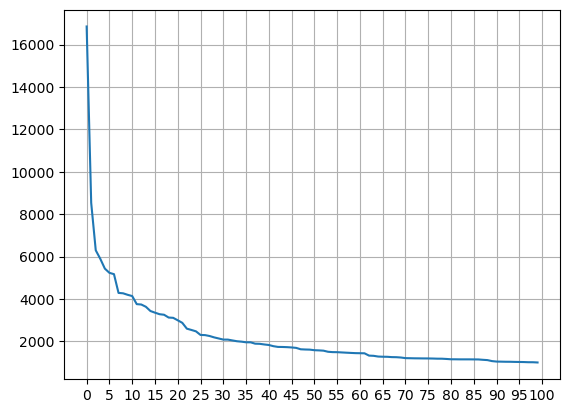

In [18]:
# frequency plot
plt.plot(np.arange(0,100), [v for k,v in dictionary.most_common(100)])
plt.xticks(np.arange(0,105,5))
plt.grid(True)

100%|██████████| 16/16 [05:40<00:00, 21.29s/it]


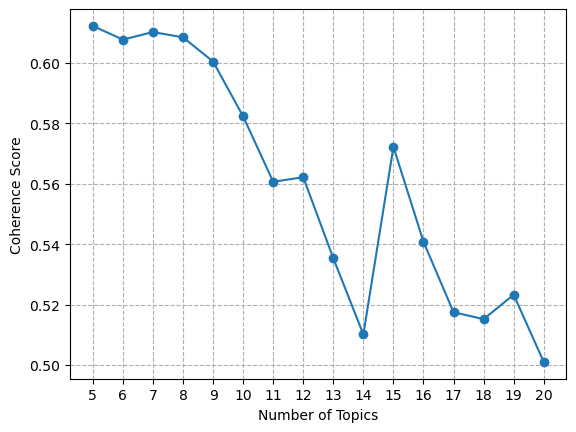

In [417]:
# put all to-be-removed words in a list (top 10 most frequent words + several other)
# remove those words from the token list
# convert the data into gensim lda model required format 
most_frequent_words = [x[0] for x in dictionary.most_common(10)]
tkns_remove_top = [[tkn for tkn in texts if tkn not in most_frequent_words] for texts in bigram_tkns]
dictionary1 = Dictionary(tkns_remove_top)
corpus1 = [dictionary1.doc2bow(text) for text in tkns_remove_top]

# calculate the cohenrence scores for models of diff number of topics
coh_scores0 = []
for num_topics in tqdm(np.arange(5,21)):
    # lda topic modelling
    lda_model = LdaModel(
        corpus=corpus1, num_topics=num_topics, id2word=dictionary1, random_state=123)
    # model to get the coherence score
    coherence_model_lda = CoherenceModel(
        model=lda_model, texts=tkns_remove_top, dictionary=dictionary1, coherence='c_v')
    coh_scores0.append(coherence_model_lda.get_coherence())

# plot coherence score VS number of topics
plt.plot(np.arange(5,21), coh_scores0, marker="o")
plt.ylabel("Coherence Score")
plt.xlabel("Number of Topics")
plt.xticks(np.arange(5,21))
plt.grid(True, ls="--")

In [422]:
lda_model = LdaModel(
    corpus=corpus1, num_topics=5, id2word=dictionary1, random_state=123)

# topic-to-word probability
topic2word = lda_model.state.get_lambda()
topic2word.shape, topic2word
# doc-to-topic probability
doc2topic = [lda_model.get_document_topics(corp, minimum_probability=0) for corp in corpus1] #list of lists of tuples

doc2top = [{t:p for t,p in LL} for LL in doc2topic]
doc2top = pd.DataFrame(doc2top).values.tolist()
doc2top = np.array(doc2top)

doc2top /= doc2top.sum(axis=1, keepdims=True)

# dictionary
vocab = [v for k,v in dictionary1.items()]

# length of each document
doc_lengths = [len(doc) for doc in tkns_remove_top]

# frequency of each word in the whole dataset
term_frequency = dictionary1.cfs
myKeys = list(term_frequency.keys())
myKeys.sort()
term_frequency = {i: term_frequency[i] for i in myKeys}

prepared_data = pyLDAvis.prepare(
    topic2word, 
    doc2top, 
    doc_lengths, 
    vocab, 
    term_frequency,
    start_index=0, 
    sort_topics=False 
)

pyLDAvis.display(prepared_data)

In [99]:
# put all to-be-removed words in a list (top 10 most frequent words + several other)
# remove those words from the token list
# convert the data into gensim lda model required format 
most_frequent_words = [x[0] for x in dictionary.most_common(10)] + ['good', 'want', 'know']
tkns_remove_top = [[tkn for tkn in texts if tkn not in most_frequent_words] for texts in bigram_tkns]
dictionary1 = Dictionary(tkns_remove_top)
corpus1 = [dictionary1.doc2bow(text) for text in tkns_remove_top]

# calculate the cohenrence scores for models of diff number of topics
coh_scores = []
for num_topics in tqdm(np.arange(5,21)):
    # lda topic modelling
    lda_model = LdaModel(
        corpus=corpus1, num_topics=num_topics, id2word=dictionary1, random_state=123)
    # model to get the coherence score
    coherence_model_lda = CoherenceModel(
        model=lda_model, texts=tkns_remove_top, dictionary=dictionary1, coherence='c_v')
    coh_scores.append(coherence_model_lda.get_coherence())
    
coh_scores

100%|██████████| 16/16 [07:31<00:00, 28.22s/it]


[0.5892188842717518,
 0.5759783096611586,
 0.5655537949333339,
 0.5920861021366683,
 0.5640177144353051,
 0.5350730733247324,
 0.5661670614717802,
 0.5800472954092157,
 0.5408092097421042,
 0.531478478303074,
 0.5421567995044712,
 0.5050600741933826,
 0.5089529659701174,
 0.5044548364440969,
 0.4889849558487467,
 0.4605386650603015]

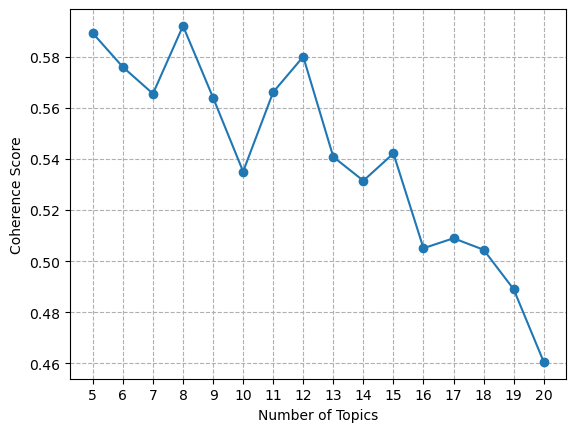

In [100]:
# plot coherence score VS number of topics
plt.plot(np.arange(5,21), coh_scores, marker="o")
plt.ylabel("Coherence Score")
plt.xlabel("Number of Topics")
plt.xticks(np.arange(5,21))
plt.grid(True, ls="--")

In [294]:
# define the optimal number of topics (highest coherence score, less topics)
bestNum = 6
lda_model = LdaModel(
    corpus=corpus1, num_topics=bestNum, id2word=dictionary1, random_state=123)

In [295]:
lda_model.save("LDAmodel")

In [21]:
lda_model = LdaModel.load("LDAmodel")

In [14]:
# show the topics' words
lda_model.show_topics(num_words = 8)

[(0,
  '0.014*"mile" + 0.012*"oil" + 0.012*"dealer" + 0.012*"issue" + 0.011*"replace" + 0.011*"engine" + 0.010*"warranty" + 0.009*"check"'),
 (1,
  '0.010*"time" + 0.010*"issue" + 0.009*"engine" + 0.009*"start" + 0.007*"turn" + 0.006*"light" + 0.006*"run" + 0.006*"work"'),
 (2,
  '0.008*"people" + 0.008*"find" + 0.007*"work" + 0.007*"love" + 0.007*"miata" + 0.006*"price" + 0.006*"time" + 0.006*"great"'),
 (3,
  '0.010*"work" + 0.008*"tune" + 0.007*"radio" + 0.007*"sure" + 0.006*"model" + 0.006*"use" + 0.006*"need" + 0.006*"new"'),
 (4,
  '0.008*"wheel" + 0.008*"find" + 0.007*"model" + 0.006*"light" + 0.006*"red" + 0.006*"black" + 0.006*"color" + 0.005*"one"'),
 (5,
  '0.009*"new" + 0.008*"love" + 0.008*"well" + 0.007*"fun" + 0.007*"turbo" + 0.007*"mile" + 0.006*"need" + 0.006*"tire"')]

## check example comments for each topic

In [21]:
# doc-to-topic probability
doc2topic = [lda_model.get_document_topics(corp, minimum_probability=0) for corp in corpus1] #list of lists of tuples

doc2top = [{t:p for t,p in LL} for LL in doc2topic]
doc2top = pd.DataFrame(doc2top).values.tolist()
doc2top = np.array(doc2top)

doc2top /= doc2top.sum(axis=1, keepdims=True)

In [62]:
## check examples for each topic
for i, topic in enumerate(lda_model.show_topics(num_words = 8)):
    print("Topic", topic[0])
    print(topic[1])
    print("------------------------------------------------------")
    print("Examples:")
    for count, index in enumerate(pd.DataFrame(doc2top).sort_values(by=[i], ascending=False).reset_index()['index'][:10].to_list()):
        print(count,")",dataLong[index])
    print("===================================================================")
    print()


Topic 0
0.014*"mile" + 0.012*"oil" + 0.012*"dealer" + 0.012*"issue" + 0.011*"replace" + 0.011*"engine" + 0.010*"warranty" + 0.009*"check"
------------------------------------------------------
Examples:
0 ) Hello everyone. I've got a manual 2013 abarth, 75K miles. She's got some serious problems and hasn't been drive-able for several months now. Started with a whirring coming from the transmission (throw out bearing dying) and ended with a completely nonfunctional clutch. The cause, at this point, I believe to be a blown input shaft seal, which sprayed the clutch assembly with trans fluid and completely drained the transmission of fluid. Now I must replace the clutch assembly and throw out bearing at a minimum, but I am sure there will be more as I do not yet know the cause of the blown seal.

Financially, this will be really difficult for me, I can barely afford the parts, and I absolutely cannot afford to take it to the dealer, I will have to do this 14 hour job myself. Warranty is o

# pyLDAvis

In [300]:
print("Num docs:",len(tkn_long))
print("Num Vocabs:",len(dictionary1))
print("Num topics:", bestNum)

Num docs: 28580
Num Vocabs: 23108
Num topics: 6


In [301]:
# topic-to-word probability
topic2word = lda_model.state.get_lambda()
topic2word.shape, topic2word

((6, 23108),
 array([[4.0078152e+01, 3.1029578e+02, 3.3073986e+01, ..., 1.6672257e-01,
         4.3187225e-01, 1.6710016e-01],
        [4.7467438e+02, 1.1818769e+02, 7.9984198e+00, ..., 1.6671574e-01,
         1.6668865e-01, 1.6706020e-01],
        [1.3292244e+02, 2.2056332e+02, 7.5956669e+00, ..., 1.6673014e-01,
         2.1740106e-01, 1.6717035e-01],
        [3.6244858e+01, 6.0515751e+01, 1.6836536e-01, ..., 1.6674857e-01,
         1.6670451e-01, 1.6734026e-01],
        [5.1723790e+00, 4.8202747e+01, 2.7050692e-01, ..., 3.2858360e-01,
         1.7479983e-01, 1.6728270e-01],
        [1.4014592e+02, 2.0895326e+02, 2.6526098e+01, ..., 3.2388705e-01,
         1.6668716e-01, 1.3546891e+00]], dtype=float32))

In [302]:
doc2top.shape, doc2top

((28580, 6),
 array([[0.13634795, 0.01127767, 0.01120585, 0.01127406, 0.01117355,
         0.81872092],
        [0.01051296, 0.0104822 , 0.01060214, 0.13003439, 0.82784735,
         0.01052097],
        [0.71037944, 0.00911815, 0.25324897, 0.00907176, 0.00906367,
         0.00911801],
        ...,
        [0.00523197, 0.29561532, 0.00524016, 0.00523511, 0.0052511 ,
         0.68342633],
        [0.04041587, 0.34556545, 0.01731618, 0.16055973, 0.15689882,
         0.27924395],
        [0.01860181, 0.01855968, 0.76850582, 0.15702538, 0.01865109,
         0.01865622]]))

In [303]:
# dictionary
vocab = [v for k,v in dictionary1.items()]

# length of each document
doc_lengths = [len(doc) for doc in tkns_remove_top]

# frequency of each word in the whole dataset
term_frequency = dictionary1.cfs
myKeys = list(term_frequency.keys())
myKeys.sort()
term_frequency = {i: term_frequency[i] for i in myKeys}

prepared_data = pyLDAvis.prepare(
    topic2word, 
    doc2top, 
    doc_lengths, 
    vocab, 
    term_frequency,
    start_index=0, 
    sort_topics=False 
)

In [313]:
pyLDAvis.save_html(prepared_data, 'ldavis_whole.html')
pyLDAvis.display(prepared_data)

# visualisations (comment count & topic distribution Over time)

In [22]:
## add newly scraped data (mid apr - early aug)

# read new files
basepath = "C:/Users/Alvis Cheung/Desktop/Bayes/Term 3/Applied Research Project/Data Ready/new/"

df_RA2 = pd.read_csv(basepath+"redditapi_abarth_new.csv", encoding='latin1')
df_RA2cm = pd.read_csv(basepath+"redditapi_abarth_cm_new.csv", encoding='latin1')
df_RF2 = pd.read_csv(basepath+"redditapi_fiat_abarth_new.csv", encoding='latin1')
df_RF2cm = pd.read_csv(basepath+"redditapi_fiat_abarth_cm_new.csv", encoding='latin1')

df_RA2 = df_RA2.drop(columns=['Unnamed: 0'])
df_RA2cm = df_RA2cm.drop(columns=['Unnamed: 0'])
df_RF2 = df_RF2.drop(columns=['Unnamed: 0'])
df_RF2cm = df_RF2cm.drop(columns=['Unnamed: 0'])

# combine with old df
#newdf = dfCleanText.copy()
framesNew = [df_RA2[['text','time']], 
             df_RA2cm[['text','time']], 
             df_RF2[['text','time']], 
             df_RF2cm[['text','time']]]
#newdf = pd.concat([newdf, pd.concat(framesNew)])
newdf = pd.concat(framesNew)

# remove useless rows
newdf = newdf[(newdf.text!="[deleted]") &
             (newdf.text!="[removed]") &
             (newdf.text.notna()) &
             (newdf.text.notnull())].reset_index(drop=True)


In [50]:
newdf.to_csv("newdf.csv")

In [49]:
len(newdf)

2736

In [346]:
# combine new and old data
dfCount = pd.concat([dfCleanText, newdf])

# convert to datetime
dfCount.time = pd.to_datetime(dfCount.time,unit='s')
dfCount['year'] = [x.year for x in dfCount.time]
dfCount['quarter'] = [(x.month-1)//3+1 for x in dfCount.time]
dfCount['month'] = [x.month for x in dfCount.time]
dfCount['day'] = [x.day for x in dfCount.time]

dfCount['week'] = [x.isocalendar()[1] for x in dfCount.time]
dfCount['year2'] = [x.isocalendar()[0] for x in dfCount.time]

In [317]:
print(dfCount[(dfCount.day<=3)&(dfCount.week>=52)].time.to_string())

107     2022-01-01 12:37:55
454     2021-01-03 08:07:54
455     2021-01-03 02:15:29
456     2021-01-03 00:24:58
457     2021-01-01 01:29:29
3902    2022-01-02 17:50:02
3903    2022-01-02 18:14:23
3904    2022-01-02 20:48:32
3906    2022-01-02 18:14:50
3907    2022-01-02 18:15:09
3908    2022-01-02 20:52:07
3910    2022-01-01 17:53:33
3911    2022-01-01 17:50:47
3912    2022-01-01 18:06:58
3913    2022-01-01 20:21:02
3914    2022-01-02 01:14:37
3915    2022-01-01 18:07:17
3916    2022-01-01 20:47:32
3917    2022-01-02 01:33:59
3918    2022-01-01 18:08:09
3919    2022-01-01 18:11:18
3921    2022-01-01 18:10:07
3922    2022-01-01 18:15:38
3924    2022-01-01 18:16:32
3945    2022-01-01 04:40:51
3946    2022-01-01 01:10:15
3949    2022-01-01 00:23:51
3951    2022-01-01 00:57:37
3952    2022-01-01 01:12:46
3953    2022-01-01 00:26:08
3954    2022-01-01 00:24:12
3955    2022-01-01 00:48:04
3956    2022-01-01 00:56:43
3957    2022-01-01 01:30:07
3958    2022-01-01 01:30:57
3960    2022-01-01 1

In [319]:
print(dfCount[(dfCount.day>=29)&(dfCount.week==1)].time.to_string())

20882   2019-12-30 21:30:25
20883   2019-12-30 21:11:58
20884   2019-12-31 10:05:20
20885   2019-12-31 14:38:09
20887   2019-12-31 06:34:49
20889   2019-12-30 21:33:04
20890   2019-12-30 21:15:32
20893   2019-12-30 22:18:19
20895   2019-12-30 05:24:48
20896   2019-12-30 14:34:44
20897   2019-12-30 18:19:37
20908   2019-12-30 18:43:28
21141   2019-12-30 06:15:00
25984   2018-12-31 00:37:29
25987   2018-12-31 02:43:45
25988   2018-12-31 02:57:13
25989   2018-12-31 00:23:03
25990   2018-12-31 00:35:24
25991   2018-12-31 00:59:14
25992   2018-12-31 12:45:30
25993   2018-12-31 12:49:33
25994   2018-12-31 16:41:25
25995   2018-12-31 18:52:38
25998   2018-12-31 00:40:39
25999   2018-12-31 02:08:49
26000   2018-12-31 06:18:46
26003   2018-12-31 00:38:26
26004   2018-12-31 16:50:27
26005   2018-12-31 19:48:12
26008   2018-12-31 00:39:25
26009   2018-12-31 00:53:00
26010   2018-12-31 01:17:04
26011   2018-12-31 18:11:19
26012   2018-12-31 16:53:16
26015   2018-12-31 17:05:39
26018   2018-12-31 1

In [448]:
dfCount.time.max()

Timestamp('2023-08-07 00:07:15')

### comment count

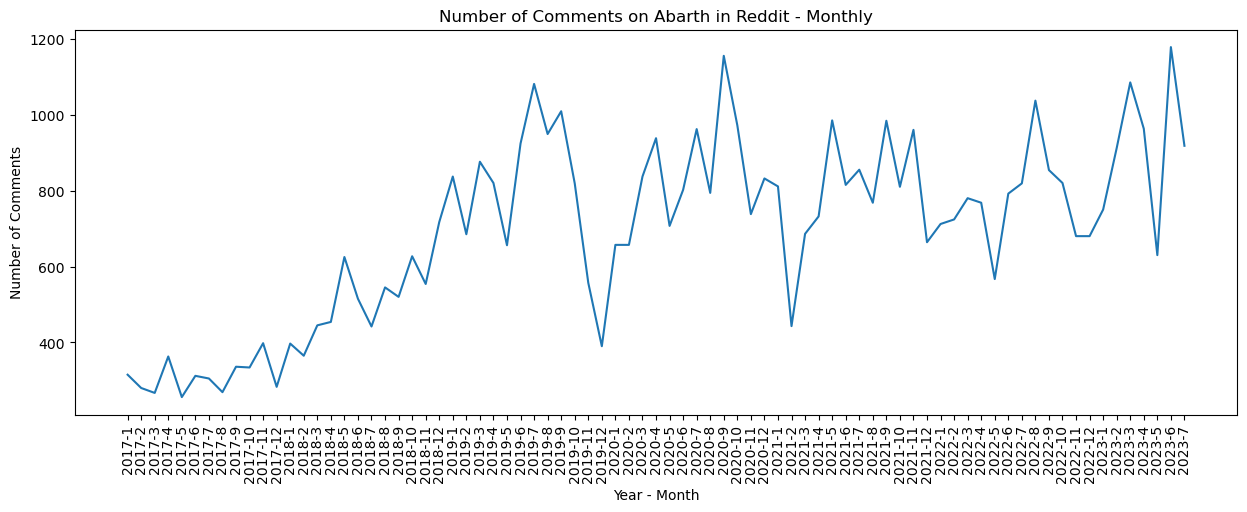

In [393]:
# group by year, quarter, topic, then get the count
#result = dfCount[(dfCount.year>=2017)][['year','month']].groupby(['year','month']).size()
result = dfCount[(dfCount.year>=2017)&(dfCount.time<datetime.datetime(2023,8,1))][['year','month']].groupby(['year','month']).size()
result = pd.DataFrame(result)
result.reset_index(inplace=True)
#result
result['x'] = [str(x)+'-'+str(y) for x,y in zip(result.year, result.month)]
result

result.plot(x = 'x',
            y = 0,
            figsize = (15, 5),
            legend = False)


plt.title("Number of Comments on Abarth in Reddit - Monthly")
plt.xticks(result.index, result.x, rotation = 90)
plt.xlabel('Year - Month')
plt.ylabel('Number of Comments')
plt.show()

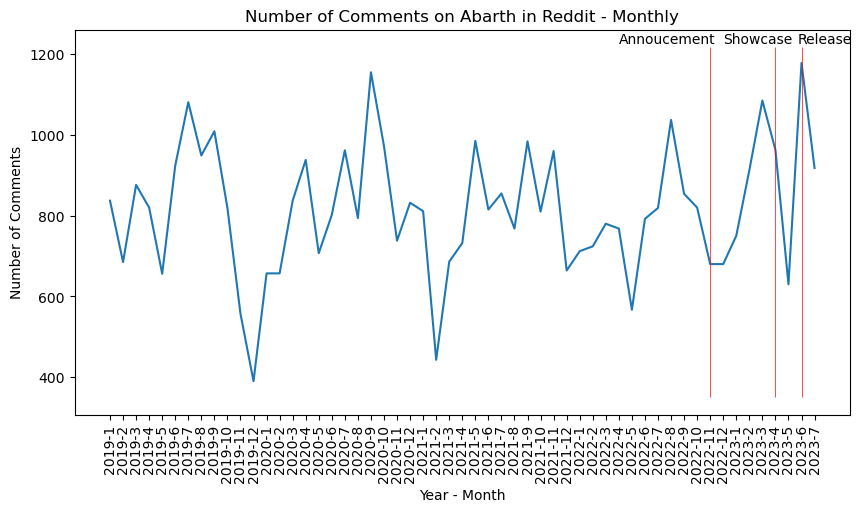

In [410]:
# group by year, quarter, topic, then get the count
#result = dfCount[(dfCount.year>=2017)][['year','month']].groupby(['year','month']).size()
result = dfCount[(dfCount.year>=2019)&(dfCount.time<datetime.datetime(2023,8,1))][['year','month']].groupby(['year','month']).size()
result = pd.DataFrame(result)
result.reset_index(inplace=True)
#result
result['x'] = [str(x)+'-'+str(y) for x,y in zip(result.year, result.month)]
result

result.plot(x = 'x',
            y = 0,
            figsize = (10, 5),
            legend = False)


ymin, ymax = plt.ylim()
plt.vlines(result.x.to_list().index('2022-11'),ymin, ymax,color="r",lw=0.5)
plt.vlines(result.x.to_list().index('2023-4'),ymin, ymax,color="r",lw=0.5)
plt.vlines(result.x.to_list().index('2023-6'),ymin, ymax,color="r",lw=0.5)

plt.text(result.x.to_list().index('2022-11')-7, ymax+10, "Annoucement")
plt.text(result.x.to_list().index('2023-4')-4, ymax+10, "Showcase")
plt.text(result.x.to_list().index('2023-6')-0.3, ymax+10, "Release")

plt.title("Number of Comments on Abarth in Reddit - Monthly")
plt.xticks(result.index, result.x, rotation = 90)
plt.xlabel('Year - Month')
plt.ylabel('Number of Comments')
plt.show()

In [365]:
for x in [datetime.datetime(2022,11,22), datetime.datetime(2023,4,22), datetime.datetime(2023,6,15)]:
    print(str(x.isocalendar()[0]) + "-" + str(x.isocalendar()[1]))

2022-47
2023-16
2023-24


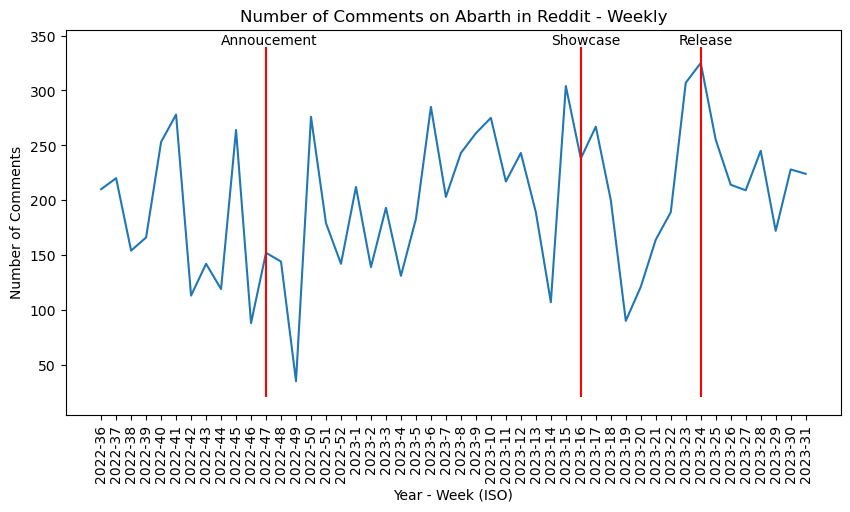

In [461]:
# group by year, quarter, topic, then get the count
#result = dfCount[(dfCount.year>=2017)][['year','month']].groupby(['year','month']).size()
result = dfCount[(dfCount.time>=datetime.datetime(2022,9,5))&(dfCount.time<datetime.datetime(2023,8,7))][['year2','week']].groupby(['year2','week']).size()
result = pd.DataFrame(result)
result.reset_index(inplace=True)
#result
result['x'] = [str(x)+'-'+str(y) for x,y in zip(result.year2, result.week)]
result

result.plot(x = 'x',
            y = 0,
            figsize = (10, 5),
            legend = False)

ymin, ymax = plt.ylim()
plt.vlines(result.x.to_list().index('2022-47'),ymin, ymax,color="r")
plt.vlines(result.x.to_list().index('2023-16'),ymin, ymax,color="r")
plt.vlines(result.x.to_list().index('2023-24'),ymin, ymax,color="r")

plt.text(result.x.to_list().index('2022-47')-3, ymax+3, "Annoucement")
plt.text(result.x.to_list().index('2023-16')-2, ymax+3, "Showcase")
plt.text(result.x.to_list().index('2023-24')-1.5, ymax+3, "Release")

plt.title("Number of Comments on Abarth in Reddit - Weekly")
plt.xticks(result.index, result.x, rotation = 90)
plt.xlabel('Year - Week (ISO)')
plt.ylabel('Number of Comments')
plt.show()

### topic distribution

#### assign topics

In [29]:
# tokenize new df
new_tkn = [preprocess(text) for text in tqdm(newdf.text)]
new_tkn = [(i,t) for i,t in enumerate(new_tkn) if t != []]

100%|██████████| 2736/2736 [00:25<00:00, 107.57it/s]


In [42]:
## cleaned comments (eg comments with only stop words don't mean anything)

# remove frequent words from all doc tokens
tokens_filtered = [(i,[tkn for tkn in texts if tkn not in most_frequent_words]) for i,texts in tkn_docs]
new_filtered = [(i,[tkn for tkn in texts if tkn not in most_frequent_words]) for i,texts in new_tkn]
tokens_filtered[:3], new_filtered[:3]

([(0,
   ['hello',
    'develop',
    'squealing',
    'noise',
    'brake',
    'need',
    'replacement',
    'upgrade',
    'stock',
    'brake',
    'suggestion',
    'upgrade',
    'cost',
    'help',
    'appreciate']),
  (1,
   ['hello',
    'fellas',
    'competizione',
    'series',
    'eu',
    'configuration',
    'export',
    'florida',
    'possible',
    'register',
    'order',
    'advice',
    'welcome',
    'great',
    'day']),
  (2,
   ['able',
    'find',
    'dryflow',
    'air',
    'filter',
    'deal',
    'oil',
    'base',
    'air',
    'filter',
    'well',
    'airflow',
    'ease',
    'maintenance',
    'expect',
    'power',
    'gain',
    'aem',
    'dryflow',
    'mile',
    'great',
    'recommendation',
    'great'])],
 [(0,
   ['howdy',
    'title',
    'say',
    'm',
    'prospective',
    'buyer',
    'm',
    'actually',
    'dealership',
    'monday',
    'test',
    'mile',
    'asking',
    'price',
    'm',
    'super',
    'excited',
  

In [51]:
## put everything in a df

df = pd.concat([
        dfCleanText.loc[[i for i,t in tokens_filtered]],
        newdf.loc[[i for i,t in new_filtered]]
    ]).reset_index()
df['tokens'] = [t for i,t in tokens_filtered] + [t for i,t in new_filtered]
#df = dfCleanText.loc[[i for i,t in tokens_filtered]].reset_index(drop=True)
#df['tokens'] = [t for i,t in tokens_filtered]

# convert to datetime
df.time = pd.to_datetime(df.time,unit='s')
df['year'] = [x.year for x in df.time]
df['quarter'] = [(x.month-1)//3+1 for x in df.time]
df['month'] = [x.month for x in df.time]
df['week'] = [x.week for x in df.time]

# get the most probable topic for each comment
df['doc2top'] = [lda_model.get_document_topics(dictionary1.doc2bow(text)) for text in df.tokens]
df['topic'] = [[i for i,p in doc][np.argmax([p for i,p in doc])] for doc in df.doc2top]
df['topic'] = [0 if x==1 else x for x in df.topic]
df

index                                               text  \
0          0  Hello everyone, I own a 2016 Abarth 595 which ...   
1          1  Hello fellas,\n\nI got a ‘19 Competizione Seri...   
2          2  I wasn’t able to find dryflow air filters for ...   
3          3  I'll buy from EC if need be but if I can save ...   
4          4  Any one know what could be going on? My ESC li...   
...      ...                                                ...   
63349   2731  Looks like it??ll have to be replaced. Thanks...   
63350   2732  You could see if there is a line out, I assume...   
63351   2733  In the bin since it's not an Abarth :)\nBut or...   
63352   2734  Well, I know it's not the original abarth vers...   
63353   2735  Just messing with you.  I also ran a big Abart...   

                     time                                             tokens  \
0     2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
1     2022-04-18 09:30:26  [hello, fellas, competizione, series, eu, conf...   
2     2022-04-16 20:51:24  [able, find, dryflow, air, filter, deal, oil, ...   
3     2022-04-15 17:17:11                          [ec, need, save, to, lol]   
4     2022-04-15 01:57:54  [esc, light, come, highway, fine, normal, caus...   
...                   ...                                                ...   
63349 2023-06-05 17:43:46                             [replace, thank, help]   
63350 2023-06-05 20:45:36  [line, assume, sub, use, line, work, hook, ext...   
63351 2023-05-19 15:03:08        [bin, originally, speed, logo, emblem, big]   
63352 2023-05-19 15:39:46  [original, version, logo, criminal, problem, i...   
63353 2023-05-19 16:46:33  [mess, run, big, sticker, bravo, mainly, hide,...   

       year  quarter  month  week  \
0      2022        2      4    16   
1      2022        2      4    16   
2      2022        2      4    15   
3      2022        2      4    15   
4      2022        2      4    15   
...     ...      ...    ...   ...   
63349  2023        2      6    23   
63350  2023        2      6    23   
63351  2023        2      5    20   
63352  2023        2      5    20   
63353  2023        2      5    20   

                                                 doc2top  topic  
0      [(0, 0.19780774), (1, 0.010553178), (2, 0.0105...      5  
1      [(0, 0.010512961), (1, 0.010482197), (2, 0.010...      4  
2                      [(0, 0.5322638), (1, 0.43628427)]      0  
3      [(0, 0.033603497), (1, 0.03431231), (2, 0.8307...      2  
4      [(0, 0.014031509), (1, 0.9301736), (2, 0.01393...      0  
...                                                  ...    ...  
63349  [(0, 0.7895624), (1, 0.04192133), (2, 0.042262...      0  
63350  [(0, 0.016764054), (1, 0.01680686), (2, 0.0167...      3  
63351  [(0, 0.023905028), (1, 0.024093792), (2, 0.245...      5  
63352  [(0, 0.018711204), (1, 0.018685376), (2, 0.018...      5  
63353  [(2, 0.3265045), (3, 0.30364075), (4, 0.235311...      2  

[63354 rows x 10 columns]

In [648]:
df['week2'] = [x.isocalendar()[1] for x in df.time]
df['year2'] = [x.isocalendar()[0] for x in df.time]
df['yw'] = [str(x)+'-'+str(y).zfill(2) for x,y in zip(df.year2, df.week2)]
df.head()

index                                               text  \
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   
1      1  Hello fellas,\n\nI got a ‘19 Competizione Seri...   
2      2  I wasn’t able to find dryflow air filters for ...   
3      3  I'll buy from EC if need be but if I can save ...   
4      4  Any one know what could be going on? My ESC li...   

                 time                                             tokens  \
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
1 2022-04-18 09:30:26  [hello, fellas, competizione, series, eu, conf...   
2 2022-04-16 20:51:24  [able, find, dryflow, air, filter, deal, oil, ...   
3 2022-04-15 17:17:11                          [ec, need, save, to, lol]   
4 2022-04-15 01:57:54  [esc, light, come, highway, fine, normal, caus...   

   year  quarter  month  week  \
0  2022        2      4    16   
1  2022        2      4    16   
2  2022        2      4    15   
3  2022        2      4    15   
4  2022        2      4    15   

                                             doc2top  topic Sentiment  week2  \
0  [(0, 0.19780774), (1, 0.010553178), (2, 0.0105...      5  negative     16   
1  [(0, 0.010512961), (1, 0.010482197), (2, 0.010...      4   neutral     16   
2                  [(0, 0.5322638), (1, 0.43628427)]      0  negative     15   
3  [(0, 0.033603497), (1, 0.03431231), (2, 0.8307...      2  positive     15   
4  [(0, 0.014031509), (1, 0.9301736), (2, 0.01393...      0  negative     15   

   year2       yw  
0   2022  2022-16  
1   2022  2022-16  
2   2022  2022-15  
3   2022  2022-15  
4   2022  2022-15

In [134]:
df.time.min(), df.time.max()

(Timestamp('2013-06-25 18:18:44'), Timestamp('2023-08-07 00:07:15'))

In [52]:
df.to_csv("topics.csv")

In [672]:
df.time.min(), df.time.max()

(Timestamp('2013-06-25 18:18:44'), Timestamp('2023-08-07 00:07:15'))

#### Quarterly

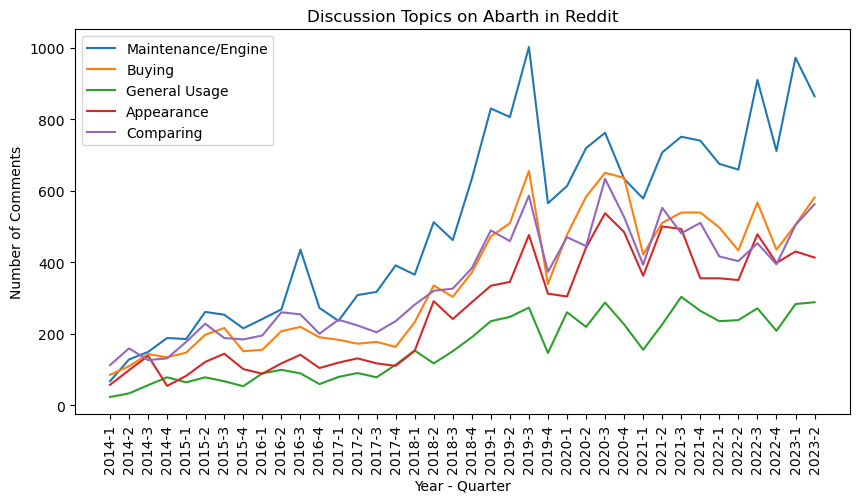

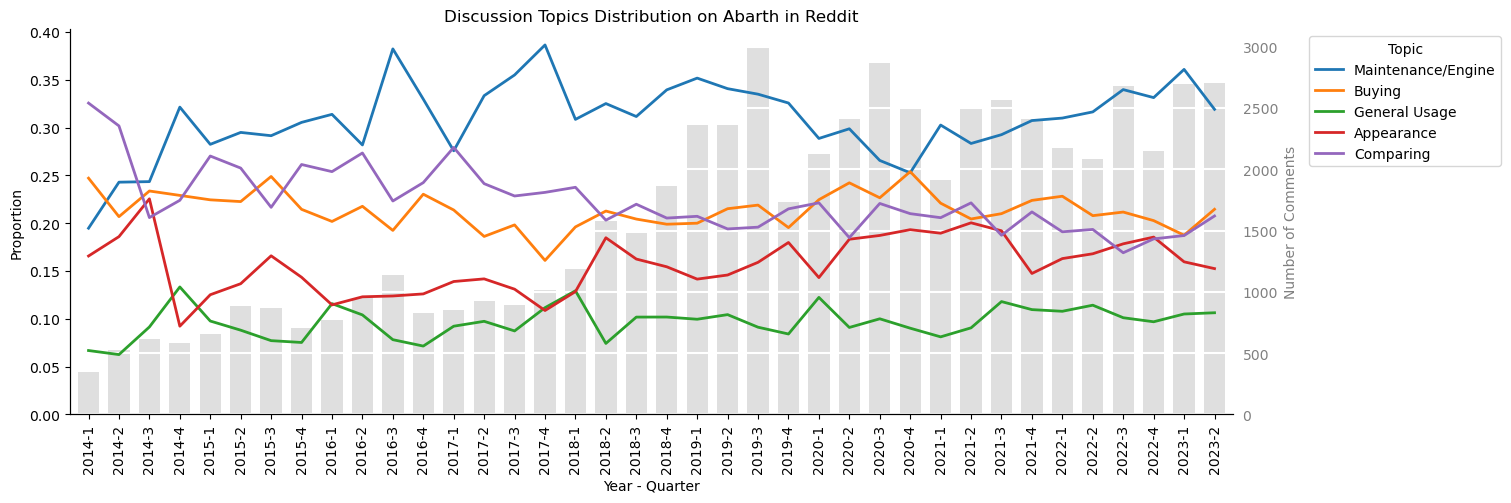

In [671]:
# group by year, quarter, topic, then get the count
# latest = early aug --> last quarter = 2023 q2
result = df[(df.year>=2014)&(df.time<datetime.datetime(2023,7,1))][['year','quarter','topic']].groupby(['year','quarter','topic']).size().unstack().fillna(0)
#result = df[(df.time<datetime.datetime(2023,4,1))][['year','quarter','topic']].groupby(['year','quarter','topic']).size().unstack().fillna(0)
result.reset_index(inplace=True)
result['x'] = [str(x)+'-'+str(y) for x,y in zip(result.year, result.quarter)]

result.plot(x = 'x', 
        y = [0,2,3,4,5],
        figsize=(10,5))
plt.title("Discussion Topics on Abarth in Reddit")
plt.xticks(result.index, result.x, rotation = 90)
plt.xlabel('Year - Quarter')
plt.ylabel('Number of Comments')
plt.legend(['Maintenance/Engine',
            'Buying',
            'General Usage',
            'Appearance',
            'Comparing'])

#==================================

# get proportions for the topics
result['total'] = result[0]+result[2]+result[3]+result[4]+result[5]
result[0] /= result['total']
result[2] /= result['total']
result[3] /= result['total']
result[4] /= result['total']
result[5] /= result['total']

#===================================

fig, ax = plt.subplots()
ax2 = ax.twinx()

# plot topic distribution
result.plot.line(x = 'x',
                y = [0,2,3,4,5],
                figsize = (15, 5),
                linewidth = 2,
                ax = ax2)
# plot number of comments
result.plot.bar(x = 'x', y = 'total',
                 linewidth = 5,
                 color = 'grey',
                 alpha = 0.25,
                 width = 0.7,
                 ax = ax,
                 legend = None)

# set title and axis labels
plt.title("Discussion Topics Distribution on Abarth in Reddit")
ax.set_xlabel('Year - Quarter')
ax2.set_ylabel('Proportion')
ax.set_ylabel('Number of Comments',color='grey')

# switch y-axis position
ax.yaxis.set_ticks_position('right')
ax.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')

# remove borders, turn y-axis for comment count to grey (supplementary axis)
ax.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(right=False)
ax.tick_params(axis='y',colors='grey')

# add gridline for comment count
for v in np.arange(0, result.total.max()+500,500):
    ax.axhline(v,0,1,c='w')

# set yticks for topic distribution (ax2: don't have tick at 0)
ax2.set_yticks(np.arange(0,result[[0,2,3,4,5]].values.max()+0.05,0.05))

# set topic legend
ax2.legend(['Maintenance/Engine',
            'Buying',
            'General Usage',
            'Appearance',
            'Comparing'],
            title = 'Topic',
            bbox_to_anchor = (1.06,1))

#### Monthly

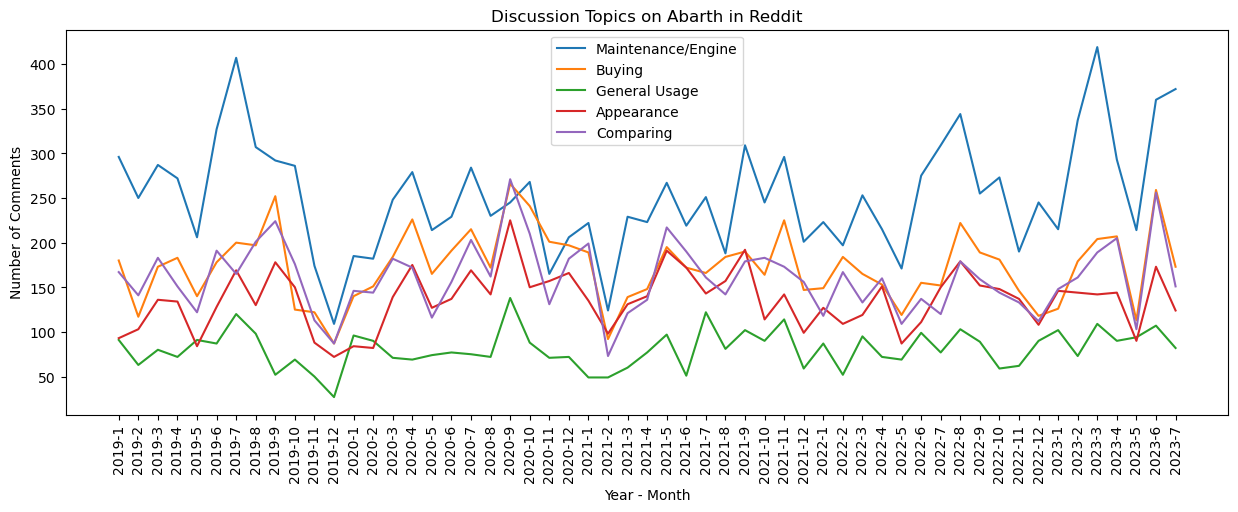

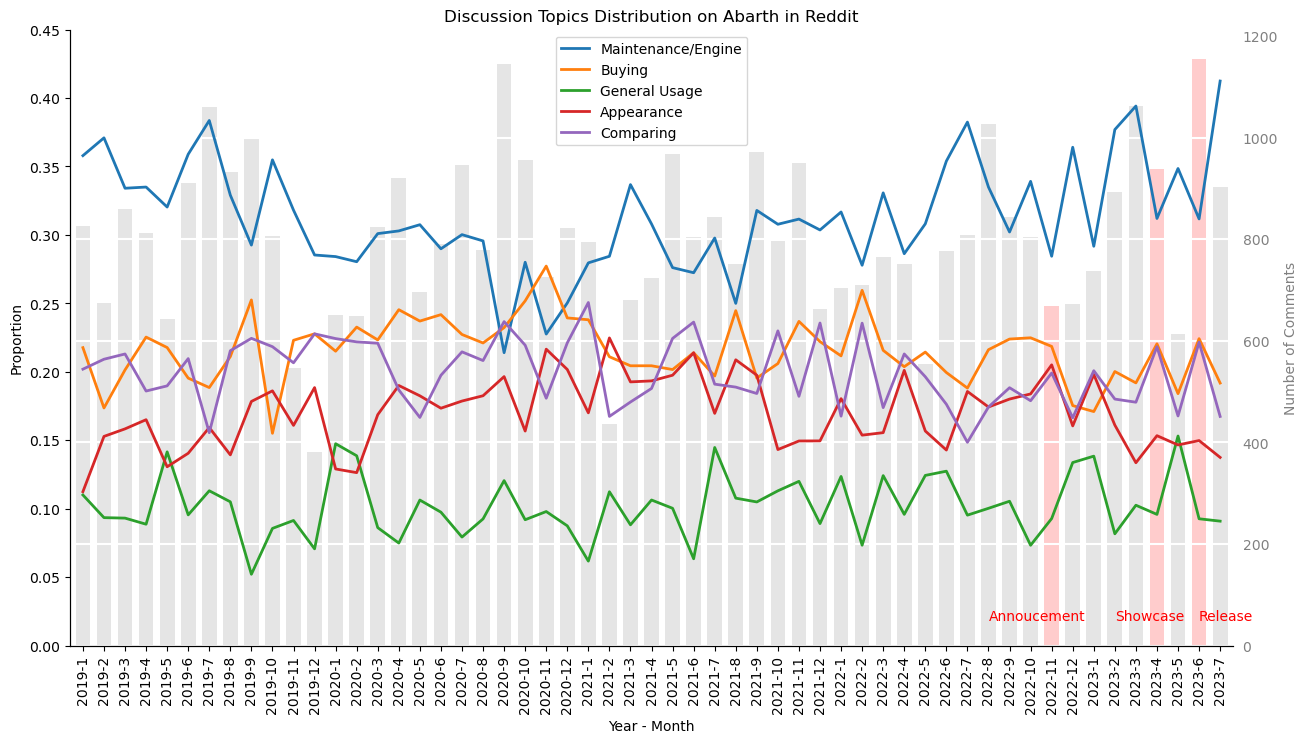

In [469]:
# group by year, month, topic, then get the count
result = df[(df.year>=2019)&(df.time<datetime.datetime(2023,8,1))][['year','month','topic']].groupby(['year','month','topic']).size().unstack()
result.reset_index(inplace=True)
result['x'] = [str(x)+'-'+str(y) for x,y in zip(result.year, result.month)]

result.plot(x = 'x', 
        y = [0,2,3,4,5],
        figsize=(15,5))
plt.title("Discussion Topics on Abarth in Reddit")
plt.xticks(result.index, result.x, rotation = 90)
plt.xlabel('Year - Month')
plt.ylabel('Number of Comments')
plt.legend(['Maintenance/Engine',
            'Buying',
            'General Usage',
            'Appearance',
            'Comparing'])
plt.show()

#==========================
# get proportions for the topics
result['total'] = result[0]+result[2]+result[3]+result[4]+result[5]
result[0] /= result['total']
result[2] /= result['total']
result[3] /= result['total']
result[4] /= result['total']
result[5] /= result['total']
#================================
## 2nd plot

fig, ax = plt.subplots()
ax2 = ax.twinx()

# plot topic distribution
result.plot.line(x = 'x',
                y = [0,2,3,4,5],
                figsize = (15, 8),
                linewidth = 2,
                ax = ax2)
# plot number of comments
color = ['red' if (i == '2022-11') or (i == '2023-4') or (i == '2023-6') else 'grey' for i in result.x] #highlight significant dates
result.plot.bar(x = 'x', y = 'total',
                 linewidth = 5,
                 color = color,
                 alpha = 0.2,
                 width = 0.7,
                 ax = ax,
                 legend = None)

ymin, ymax = ax.get_ylim()
ax.text(result.x.to_list().index('2022-11')-3, 50, "Annoucement", c='r')
ax.text(result.x.to_list().index('2023-4')-2, 50, "Showcase", c='r')
ax.text(result.x.to_list().index('2023-6'), 50, "Release", c='r')

# set title and axis labels
plt.title("Discussion Topics Distribution on Abarth in Reddit")
ax.set_xlabel('Year - Month')
ax2.set_ylabel('Proportion')
ax.set_ylabel('Number of Comments',color='grey')

# switch y-axis position
ax.yaxis.set_ticks_position('right')
ax.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')

# remove borders, turn y-axis for comment count to grey (supplementary axis)
ax.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(right=False)
ax.tick_params(axis='y',colors='grey')

# add gridline for comment count
for v in np.arange(0, result.total.max()+200,200):
    ax.axhline(v,0,1,c='w')

# set yticks for topic distribution (ax2: don't have tick at 0)
ax2.set_yticks(np.arange(0,result[[0,2,3,4,5]].values.max()+0.05,0.05))

# set topic legend
ax2.legend(['Maintenance/Engine',
            'Buying',
            'General Usage',
            'Appearance',
            'Comparing'])

#### Weekly

In [ ]:
2022-47
2023-16
2023-24

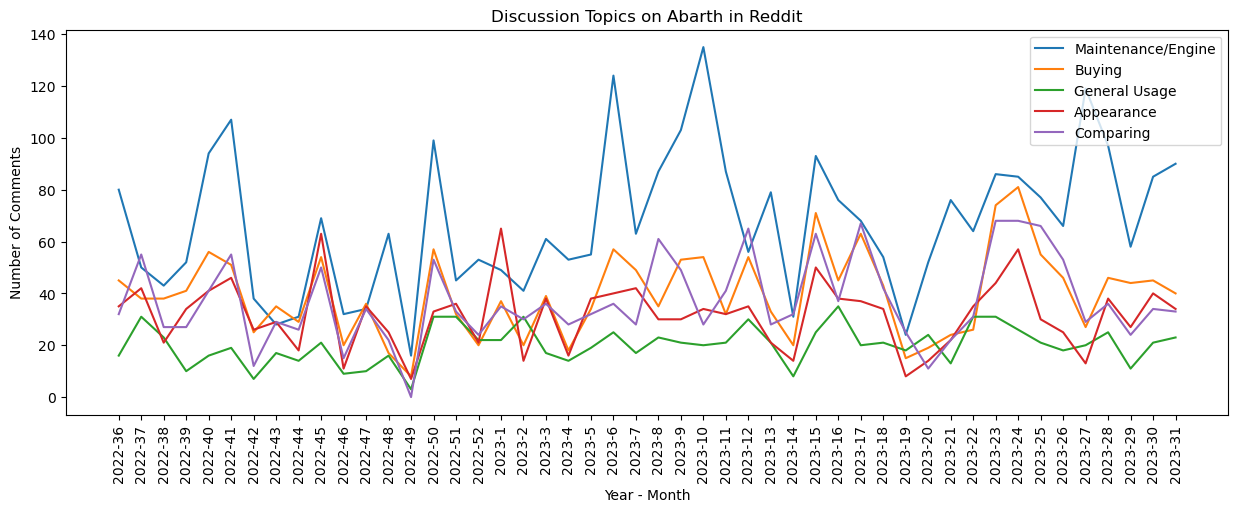

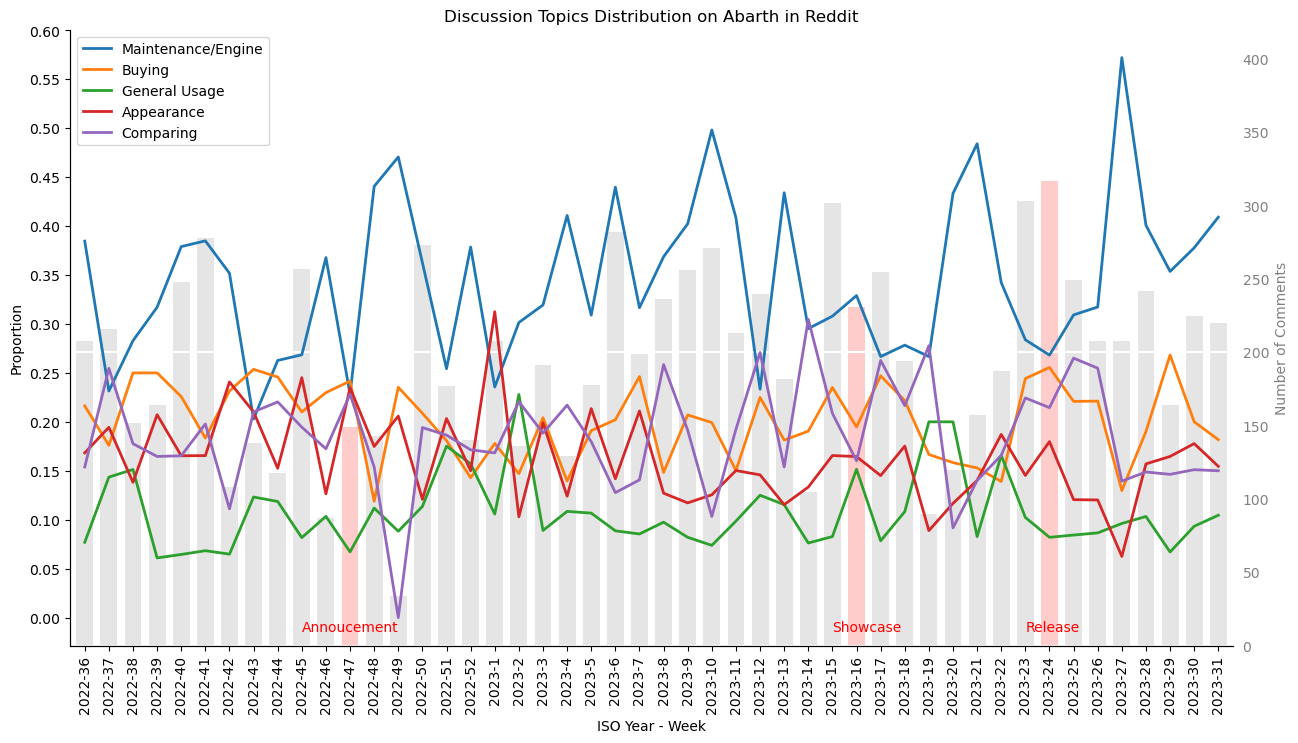

In [473]:
# group by year, month, topic, then get the count
result = df[(df.time>=datetime.datetime(2022,9,5))&(df.time<datetime.datetime(2023,8,7))][['year2','week2','topic']].groupby(['year2','week2','topic']).size().unstack().fillna(0)
result.reset_index(inplace=True)
result['x'] = [str(x)+'-'+str(y) for x,y in zip(result.year2, result.week2)]

result.plot(x = 'x', 
        y = [0,2,3,4,5],
        figsize=(15,5))
plt.title("Discussion Topics on Abarth in Reddit")
plt.xticks(result.index, result.x, rotation = 90)
plt.xlabel('Year - Month')
plt.ylabel('Number of Comments')
plt.legend(['Maintenance/Engine',
            'Buying',
            'General Usage',
            'Appearance',
            'Comparing'])
plt.show()

#==========================
# get proportions for the topics
result['total'] = result[0]+result[2]+result[3]+result[4]+result[5]
result[0] /= result['total']
result[2] /= result['total']
result[3] /= result['total']
result[4] /= result['total']
result[5] /= result['total']
#================================
## 2nd plot

fig, ax = plt.subplots()
ax2 = ax.twinx()

# plot topic distribution
result.plot.line(x = 'x',
                y = [0,2,3,4,5],
                figsize = (15, 8),
                linewidth = 2,
                ax = ax2)
# plot number of comments
color = ['red' if (i == '2022-47') or (i == '2023-16') or (i == '2023-24') else 'grey' for i in result.x] #highlight significant dates
result.plot.bar(x = 'x', y = 'total',
                 linewidth = 5,
                 color = color,
                 alpha = 0.2,
                 width = 0.7,
                 ax = ax,
                 legend = None)

ymin, ymax = ax.get_ylim()
ax.text(result.x.to_list().index('2022-47')-2, 10, "Annoucement", c='r')
ax.text(result.x.to_list().index('2023-16')-1, 10, "Showcase", c='r')
ax.text(result.x.to_list().index('2023-24')-1, 10, "Release", c='r')

# set title and axis labels
plt.title("Discussion Topics Distribution on Abarth in Reddit")
ax.set_xlabel('ISO Year - Week')
ax2.set_ylabel('Proportion')
ax.set_ylabel('Number of Comments',color='grey')

# switch y-axis position
ax.yaxis.set_ticks_position('right')
ax.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')

# remove borders, turn y-axis for comment count to grey (supplementary axis)
ax.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(right=False)
ax.tick_params(axis='y',colors='grey')

# add gridline for comment count
for v in np.arange(0, result.total.max()+200,200):
    ax.axhline(v,0,1,c='w')

# set yticks for topic distribution (ax2: don't have tick at 0)
ax2.set_yticks(np.arange(0,result[[0,2,3,4,5]].values.max()+0.05,0.05))

# set topic legend
ax2.legend(['Maintenance/Engine',
            'Buying',
            'General Usage',
            'Appearance',
            'Comparing'])

#### weekly boxplot

In [752]:
from matplotlib.patches import Rectangle
from matplotlib.ticker import FixedFormatter, FixedLocator

In [504]:
result = df[(df.time>=datetime.datetime(2018,12,31))&(df.time<datetime.datetime(2023,8,7))][['year2','week2','topic']].groupby(['year2','week2','topic']).size().unstack()
result.reset_index(inplace=True)
result

topic  year2  week2      0     2     3     4     5
0       2019      1   60.0  38.0  18.0  19.0  36.0
1       2019      2   87.0  65.0  32.0  20.0  42.0
2       2019      3   57.0  44.0  23.0  28.0  48.0
3       2019      4   62.0  21.0  17.0  23.0  26.0
4       2019      5   70.0  45.0  10.0  33.0  43.0
..       ...    ...    ...   ...   ...   ...   ...
235     2023     27  119.0  27.0  20.0  13.0  29.0
236     2023     28   97.0  46.0  25.0  38.0  36.0
237     2023     29   58.0  44.0  11.0  27.0  24.0
238     2023     30   85.0  45.0  21.0  40.0  34.0
239     2023     31   90.0  40.0  23.0  34.0  33.0

[240 rows x 7 columns]

In [706]:
# group by ISO year, week, topic, then get the count
result = df[(df.time>=datetime.datetime(2018,12,31))&(df.time<datetime.datetime(2023,8,7))][['year2','week2','topic']].groupby(['year2','week2','topic']).size().unstack().fillna(0)
result.reset_index(inplace=True)
result['x'] = [str(x)+'-'+str(y).zfill(2) for x,y in zip(result.year2, result.week2)]

#==========================
# get proportions for the topics
result['total'] = result[0]+result[2]+result[3]+result[4]+result[5]
result[0] /= result['total']
result[2] /= result['total']
result[3] /= result['total']
result[4] /= result['total']
result[5] /= result['total']

result.head()

topic  year2  week2         0         2         3         4         5  \
0       2019      1  0.350877  0.222222  0.105263  0.111111  0.210526   
1       2019      2  0.353659  0.264228  0.130081  0.081301  0.170732   
2       2019      3  0.285000  0.220000  0.115000  0.140000  0.240000   
3       2019      4  0.416107  0.140940  0.114094  0.154362  0.174497   
4       2019      5  0.348259  0.223881  0.049751  0.164179  0.213930   

topic        x  total  
0      2019-01  171.0  
1      2019-02  246.0  
2      2019-03  200.0  
3      2019-04  149.0  
4      2019-05  201.0

C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\4095051317.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg1.legendHandles[0].set_facecolor('pink')
C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\4095051317.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg2.legendHandles[0].set_facecolor('lightblue')
C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\4095051317.py:32: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg3.legendHandles[0].set_facecolor('lightgreen')
C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\4095051317.py:33: MatplotlibDeprecationWarning: The legendHandles attribut

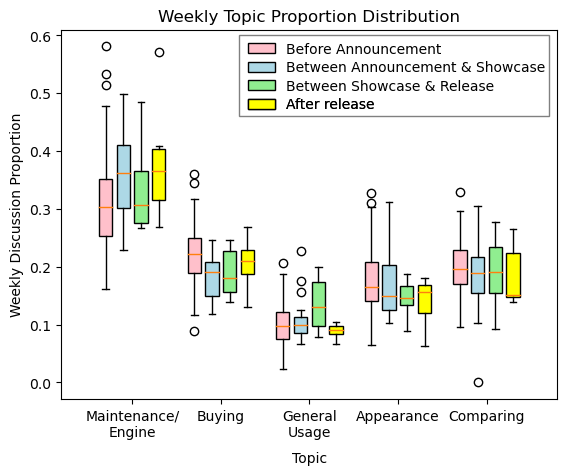

In [1073]:
#2022-47
#2023-16
#2023-24
pos = np.array([1,2,3,4,5])
width = 0.15

# plot topic proportion boxplot by topic
fig, ax = plt.subplots()
ax.boxplot(result[result.x<'2022-47'][[0,2,3,4,5]], positions=pos-0.3, widths=width, patch_artist=True, boxprops = dict(facecolor="pink"))
ax.boxplot(result[(result.x>='2022-47')&(result.x<'2023-16')][[0,2,3,4,5]], positions=pos-0.1, widths=width, patch_artist=True, boxprops = dict(facecolor="lightblue"))
ax.boxplot(result[(result.x>='2023-16')&(result.x<'2023-24')][[0,2,3,4,5]], positions=pos+0.1, widths=width, patch_artist=True, boxprops = dict(facecolor="lightgreen"))
ax.boxplot(result[result.x>='2023-24'][[0,2,3,4,5]], positions=pos+0.3, widths=width, patch_artist=True, boxprops = dict(facecolor="yellow"))

# 
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['Maintenance/\nEngine',
                    'Buying',
                    'General\nUsage',
                    'Appearance',
                    'Comparing'])
ax.set_ylabel("Weekly Discussion Proportion")
ax.set_xlabel("Topic")
ax.xaxis.set_label_coords(0.5,-0.14)
ax.set_title("Weekly Topic Proportion Distribution")

leg1 = ax.legend(['Before Announcement'],               loc=2,frameon=False,bbox_to_anchor=(0.35,1))
leg2 = ax.legend(['Between Announcement & Showcase'],   loc=2,frameon=False,bbox_to_anchor=(0.35,0.95))
leg3 = ax.legend(['Between Showcase & Release'],        loc=2,frameon=False,bbox_to_anchor=(0.35,0.9))
leg4 = ax.legend(['After release'],                     loc=2,frameon=False,bbox_to_anchor=(0.35,0.85))
leg1.legendHandles[0].set_facecolor('pink')
leg2.legendHandles[0].set_facecolor('lightblue')
leg3.legendHandles[0].set_facecolor('lightgreen')
leg4.legendHandles[0].set_facecolor('yellow')
ax.add_artist(leg1)
ax.add_artist(leg2)
ax.add_artist(leg3)
ax.add_artist(leg4)

rect = Rectangle((2.2,0.46), 3.5,0.14, linewidth=1, edgecolor='grey', facecolor='none')
ax.add_patch(rect)

fig.show()

#### keywords

In [974]:
#peaks: 2019-6-9, 2020-9-10, 2022-8, 2023-2-4, 2023-6

#2022-47
#2023-16
#2023-24
listxx = []
for t in [0,2,3,4,5]:
#for t in [0]:
    print("Topic",t)
    listx = []
    for x in [
        df[df.yw<'2022-47'],
        df[(df.yw>='2022-47') & (df.yw<'2023-16')],
        df[(df.yw>='2023-16') & (df.yw<'2023-24')],
        df[df.yw>='2023-24']
    ]:

        testing = Dictionary(x[x.topic==t].tokens).most_common()


        print([y[0] for y in testing], len(x))
        testing = [(y[0],count+1) for count, y in enumerate(testing)]

        listx.append(pd.DataFrame(testing))



    print("==========================================================================")
    listxx.append(listx)


Topic 0
['oil', 'engine', 'mile', 'issue', 'time', 'check', 'change', 'replace', 'need', 'work', 'problem', 'new', 'start', 'thing', 'come', 'try', 'year', 'warranty', 'sure', 'run', 'dealer', 'light', 'fix', 'find', 'turbo', 'say', 'turn', 'manual', 'bad', 'thank', 'right', 'battery', 'sound', 'clutch', 'way', 'happen', 'take', 'air', 'feel', 'lot', 'plug', 'gear', 'leak', 'long', 'use', 'dealership', 'day', 'pop', 'service', 'boost', 'transmission', 'high', 'tell', 'power', 'brake', 'sport', 'month', 'low', 'pretty', 'little', 'hear', 'shift', 'bit', 'code', 'help', 'cause', 'stock', 'part', 'probably', 'fine', 'owner', 'let', 'tire', 'gas', 'speed', 'maybe', 'fuel', 'filter', 'week', 'stop', 'hard', 'valve', 'test', 'break', 'well', 'intake', 'mode', 'wheel', 'normal', 'people', 'tune', 'see', 'end', 'pull', 'second', 'far', 'notice', 'actually', 'make', 'shop', 'easy', 'mean', 'leave', 'ask', 'km', 'auto', 'repair', 'system', 'able', 'model', 'pressure', 'great', 'love', 'mechanic'

In [1015]:
listx = listxx[2]
testing = listx[0]

for count, x in enumerate(listx[1:]):
    testing = testing.merge(x, how='outer', on=0)
    testing.columns = np.arange(0,count+3)

testing.sort_values(by=[4,0], inplace=True)
testing.reset_index(inplace=True,drop=True)
testing.head(10)

0      1     2      3     4
0     work    2.0   4.0    2.0   1.0
1     need    4.0   3.0   11.0   2.0
2    stock   11.0   9.0   40.0   3.0
3   change   20.0  44.0    3.0   4.0
4    sound   14.0  12.0    8.0   5.0
5    radio   13.0  59.0    1.0   6.0
6  exhaust   21.0   6.0   24.0   7.0
7     tune    1.0   1.0  106.0   8.0
8    valve   81.0  41.0   77.0   9.0
9       mm  133.0  10.0  299.0  10.0

In [942]:
testing[:10][[1,2,3,4]].T.reset_index()

index    0    1    2     3    4    5     6     7    8     9
0      1  2.0  1.0  6.0   8.0  9.0  4.0  13.0   3.0  5.0  10.0
1      2  2.0  1.0  6.0  11.0  5.0  3.0   8.0   9.0  4.0  10.0
2      3  1.0  2.0  5.0   3.0  6.0  4.0  14.0  10.0  9.0  12.0
3      4  1.0  2.0  3.0   4.0  5.0  6.0   7.0   8.0  9.0  10.0

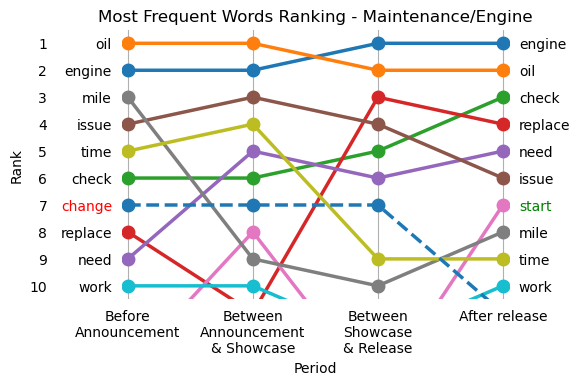

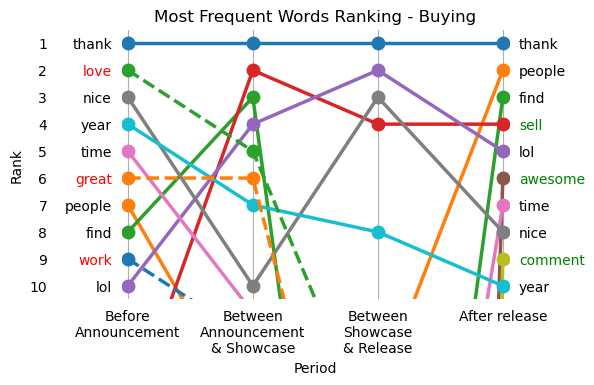

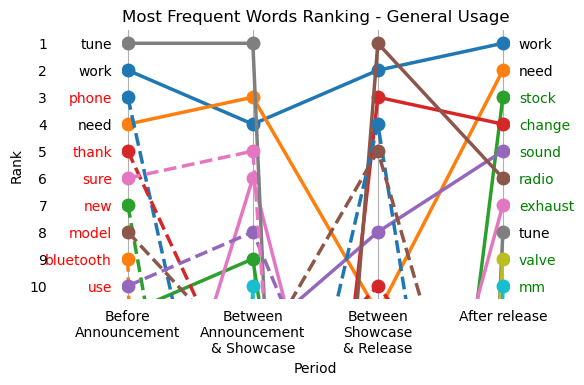

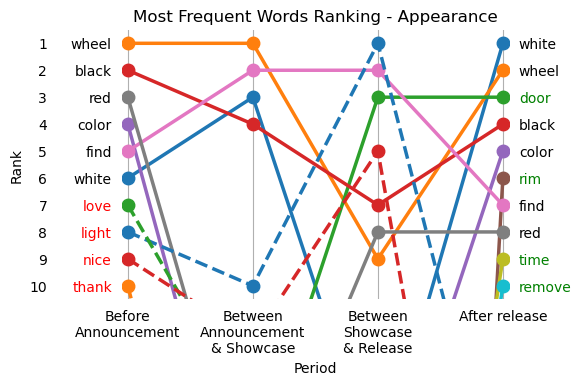

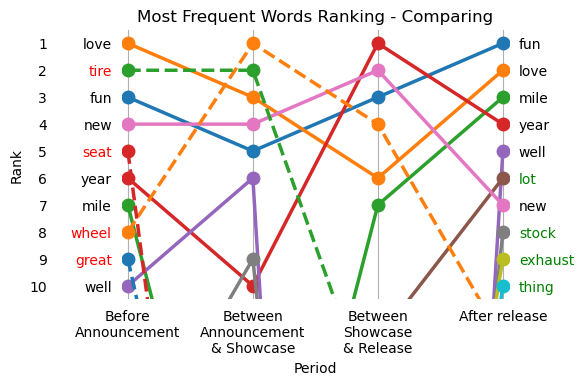

In [1072]:
for listx, top in zip(listxx, ['Maintenance/Engine',
                            'Buying',
                            'General Usage',
                            'Appearance',
                            'Comparing']):
    


    # create a df for the rankings for the 4 periods (before and after the significant dates)
    testing = listx[0]
    for count, x in enumerate(listx[1:]):
        testing = testing.merge(x, how='outer', on=0)
        testing.columns = np.arange(0,count+3)
    testing.sort_values(by=[4,0], inplace=True)
    testing.reset_index(inplace=True,drop=True)



    # plot the most frequent word rank
    fig, ax = plt.subplots(figsize=(5,3.5))
    ## plot the top 10 sort by 'after release' + not those but top 10 sort by 'before announcement' 
    for count, x in enumerate(np.arange(0,10).tolist() + (np.array(list(set(testing.sort_values(by=1)[:10][4].astype(int)) - set(np.arange(1,11))))-1).tolist()):
        testing.loc[x,[1,2,3,4]].plot(marker='o', ms=9, ax=ax, lw=2.5, style=('-' if count<10 else '--'))

    # put rank 1 in the top
    ax.set_ylim(0.5,10.5)
    ax.set_xlim(0.95,4.05)
    ax.invert_yaxis()

    # set title and axis label
    ax.set(title="Most Frequent Words Ranking - "+top, ylabel="Rank", xlabel="Period")

    # set the x,y tick lables
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Before\nAnnouncement',
                        'Between\nAnnouncement\n& Showcase',
                        'Between\nShowcase\n& Release',
                        'After release'])
    ax.set_yticks(np.arange(1,11))
    ax.tick_params(axis="y", pad=50)

    # add tick lables for the last period
    yax2 = ax.secondary_yaxis("right")
    yax2.yaxis.set_major_locator(FixedLocator(testing[4][:10].to_list()))
    yax2.yaxis.set_major_formatter(FixedFormatter(testing[0][:10].to_list()))
    ## green if not in first period top 10, else black
    colors = ['k' if i[0] else 'g' for i in testing[[0]][:10].isin(testing.sort_values(by=1)[0][:10]).values.tolist()]
    for ticklabel, tickcolor in zip(yax2.get_yticklabels(), colors):
        ticklabel.set_color(tickcolor)


    # add tick lables for the first period
    yax3 = ax.secondary_yaxis("left")
    yax3.yaxis.set_major_locator(FixedLocator(testing.sort_values(by=1)[1][:10].to_list()))
    yax3.yaxis.set_major_formatter(FixedFormatter(testing.sort_values(by=1)[0][:10].to_list()))
    ## red if not in last period top 10, else black
    colors = ['k' if i[0] else 'r' for i in testing.sort_values(by=1)[[0]][:10].isin(testing[0][:10]).values.tolist()]
    for ticklabel, tickcolor in zip(yax3.get_yticklabels(), colors):
        ticklabel.set_color(tickcolor)

    # remove all the ticks
    ax.tick_params(axis='both', which='both',
                bottom=False, top=False, labelbottom=True,
                left=False, right=False, labelleft=True)

    # remove the lines, boxes
    ax.spines[:].set_visible(False)
    yax2.tick_params(color='w')
    yax2.spines[:].set_visible(False)
    yax3.tick_params(color='w')
    yax3.spines[:].set_visible(False)

    # add vertical grid line
    ax.xaxis.grid(True)

    plt.show()


# Sentiment Analysis

## test model

### load model

In [1]:
from transformers import pipeline

pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

c:\Anaconda\envs\anlp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


### test model

In [22]:
dfSent = pd.read_csv("C:/Users/Alvis Cheung/Desktop/Bayes/Term 3/Applied Research Project/sentiment_manual_500.csv").drop(columns=['Unnamed: 0'])
dfSent.head()

manual                                   Original_Comment
0      -  The new one sucks very hard to work on and cos...
1      =                            Oh for the Morris minor
2      -  imagine being set on "owning a Chevy EV."  i s...
3      =  Parts are made in china..but India wants them ...
4      =  Why, why, why do reviewers always test the top...

In [6]:
[(i, len(t)) for i, t in enumerate(dfSent.Original_Comment) if len(t)>=500]

[(24, 868),
 (45, 522),
 (145, 784),
 (178, 507),
 (242, 818),
 (248, 563),
 (252, 797),
 (258, 1025),
 (269, 862),
 (281, 522),
 (304, 955),
 (321, 517),
 (355, 502),
 (360, 544),
 (361, 584),
 (390, 1206),
 (426, 539),
 (434, 1271),
 (436, 619),
 (449, 868),
 (461, 657)]

In [24]:
dfSent = dfSent[dfSent['Original_Comment'].str.len() < 500]
dfSent.reset_index(drop=True, inplace=True)
dfSent

manual                                   Original_Comment
0        -  The new one sucks very hard to work on and cos...
1        =                            Oh for the Morris minor
2        -  imagine being set on "owning a Chevy EV."  i s...
3        =  Parts are made in china..but India wants them ...
4        =  Why, why, why do reviewers always test the top...
..     ...                                                ...
474      =  do the 5 cylinder engines have this carbon bui...
475      +  Now i can have an $80,000 coal powered car.......
476      -            It is a death trap if a truck hits you.
477      +  I have a lot of beautiful used engines and aut...
478      -  "look vegan seats, but have the option to pay ...

[479 rows x 2 columns]

In [25]:
for i,text in tqdm(enumerate(dfSent.Original_Comment)):
    tmp = pipe(text)
    dfSent.loc[i,['label','score']]=[tmp[0]['label'], tmp[0]['score']]
dfSent.head()

479it [02:23,  3.34it/s]


manual                                   Original_Comment label     score
0      -  The new one sucks very hard to work on and cos...   NEG  0.984988
1      =                            Oh for the Morris minor   NEU  0.889446
2      -  imagine being set on "owning a Chevy EV."  i s...   NEG  0.964704
3      =  Parts are made in china..but India wants them ...   NEU  0.978772
4      =  Why, why, why do reviewers always test the top...   NEG  0.958084

In [27]:
#dfManual = pd.read_csv("C:/Users/Alvis Cheung/Desktop/Bayes/Term 3/Applied Research Project/sentiment_manual200.csv")
dfSent['trueLabel'] = ['NEU' if x=='=' else 'POS' if x=='+' else 'NEG' for x in dfSent.manual]
dfSent.head()

manual                                   Original_Comment label     score  \
0      -  The new one sucks very hard to work on and cos...   NEG  0.984988   
1      =                            Oh for the Morris minor   NEU  0.889446   
2      -  imagine being set on "owning a Chevy EV."  i s...   NEG  0.964704   
3      =  Parts are made in china..but India wants them ...   NEU  0.978772   
4      =  Why, why, why do reviewers always test the top...   NEG  0.958084   

  trueLabel  
0       NEG  
1       NEU  
2       NEG  
3       NEU  
4       NEU

In [29]:
sum(dfSent.label==dfSent.trueLabel)/len(dfSent)

0.6931106471816284

### Archive

In [ ]:
dfSent.loc[200] = dfSent.loc[30]
dfSent.loc[200,['index','Original_Comment']] = [
    '30-1',
    dfSent.Original_Comment[30][:357]
]
dfSent.loc[201] = dfSent.loc[30]
dfSent.loc[201,['index','Original_Comment']] = [
    '30-2',
    dfSent.Original_Comment[30][359:]
]

In [ ]:
dfSent.loc[202] = dfSent.loc[82]
dfSent.loc[202,['index','Original_Comment']] = [
    '82-1',
    dfSent.Original_Comment[82][:369]
]
dfSent.loc[203] = dfSent.loc[82]
dfSent.loc[203,['index','Original_Comment']] = [
    '82-2',
    dfSent.Original_Comment[82][370:]
]

In [ ]:
dfSent.loc[204] = dfSent.loc[84]
dfSent.loc[204,['index','Original_Comment']] = [
    '84-1',
    dfSent.Original_Comment[84][:354]
]
dfSent.loc[205] = dfSent.loc[84]
dfSent.loc[205,['index','Original_Comment']] = [
    '84-2',
    dfSent.Original_Comment[84][355:705]
]
dfSent.loc[206] = dfSent.loc[84]
dfSent.loc[206,['index','Original_Comment']] = [
    '84-3',
    dfSent.Original_Comment[84][706:1124]
]
dfSent.loc[207] = dfSent.loc[84]
dfSent.loc[207,['index','Original_Comment']] = [
    '84-4',
    dfSent.Original_Comment[84][1125:]
]

In [ ]:
dfSent.loc[208] = dfSent.loc[159]
dfSent.loc[208,['index','Original_Comment']] = [
    '159-1',
    dfSent.Original_Comment[159][:353]
]
dfSent.loc[209] = dfSent.loc[159]
dfSent.loc[209,['index','Original_Comment']] = [
    '159-2',
    dfSent.Original_Comment[159][354:]
]

#dfSent.drop([30],inplace=True)
#dfSent.drop([82],inplace=True)
#dfSent.drop([84],inplace=True)
#dfSent.drop([159],inplace=True)
dfSent.drop(index=[30,82,84,159],inplace=True)
dfSent.reset_index(inplace=True,drop=True)

In [ ]:
dfSent.loc[206] = [30,'','','NEU',0]
dfSent.loc[207] = [82,'','','POS',0]
dfSent.loc[208] = [84,'','','NEU',0]
dfSent.loc[209] = [159,'','','NEU',0]
asd = dfSent.copy()
asd.drop(index=[196,197,198,199,200,201,202,203,204,205],inplace=True)
asd = asd.sort_values(by=['index'])
asd.reset_index(drop=True,inplace=True)
asd

index                                   Original_Comment  \
0       0                      Get some longer shorts please   
1       1                          What is the cost of this?   
2       2  Volkswagen: so where’s the parcel shelf \nCarw...   
3       3   I got my a Veloster N instead. I regret nothing.   
4       4                                           Battery?   
..    ...                                                ...   
195   195  I have promised myself never to buy a French c...   
196   196  Between GM and charging station u should get p...   
197   197  So, still hopelessly compromised, electronical...   
198   198  Great review as always. My apologies if this i...   
199   199                     now attach this to a tuner car   

                                  Preprocessed_Comment label     score  
0                                           long short   NEU  0.846711  
1                                                 cost   NEU  0.980934  
2       parcel shelf carwow mat umm tree near scotland   NEU  0.984147  
3                            veloster n instead regret   POS  0.962013  
4                                              battery   NEU  0.961264  
..                                                 ...   ...       ...  
195       promise buy french apply electric soon guess   NEU  0.816432  
196                            gm charge station u pay   NEU  0.938962  
197  hopelessly compromise electronically unreliabl...   NEG  0.983290  
198  great review apology discuss internal combusti...   POS  0.804317  
199                                       attach tuner   NEU  0.964286  

[200 rows x 5 columns]

In [ ]:
for i,x in enumerate(zip(dfSent.label,dfSent.score,dfManual.trueLabel)):
    if x[0]!=x[2]:
        print(i)
        print("model:",x[0],x[1], ", manual:",x[2])
        print(dfSent.Original_Comment[i])
        print("-----------------")

8
model: POS 0.47322970628738403 , manual: NEG
WOW!!  Yeah that is absolutely terrible.  Fortunately, Tesla plans to up its super chargers to everyone.  My EV is simply a work commuter errand runner.  Any long distance travel its ICE for me.
-----------------
13
model: NEG 0.8208203315734863 , manual: NEU
5 years and counting waiting for Matt to finally produce a video showing petrol cars driven until they run out of fuel to "see how they react". The anti EV rhetoric is strong...
-----------------
17
model: NEU 0.980635941028595 , manual: POS
thumbed up.....
-----------------
22
model: NEU 0.7099488973617554 , manual: NEG
Famous trainspoter? I've never heard of him and I'm a train enthusiast
-----------------
23
model: NEU 0.9195034503936768 , manual: POS
That’s going to sell like ice cream at our beach 🏖😍😍
-----------------
38
model: POS 0.754530668258667 , manual: NEU
Careful with my TRX 🤣🤣🤣🤣
-----------------
42
model: NEU 0.6245081424713135 , manual: NEG
Nice interior but the look 

## Model: Twitter Roberta Latest

### Sentiment Labelling

For this section of the codes, I ran in on Google Colab because the full model cannot be loaded to my device.

In [ ]:
pip install transformers

In [ ]:
from transformers import pipeline

pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfCleanText = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/cleanText.csv").drop(columns=['Unnamed: 0'])
dfCleanText.head()

text          time
0  Hello everyone, I own a 2016 Abarth 595 which ...  1.650410e+09
1  Hello fellas,\n\nI got a ‘19 Competizione Seri...  1.650274e+09
2  I wasn’t able to find dryflow air filters for ...  1.650142e+09
3  I'll buy from EC if need be but if I can save ...  1.650043e+09
4  Any one know what could be going on? My ESC li...  1.649988e+09

In [ ]:
# the model limits the input length up 512 max
texts = dfCleanText.text.to_list()
texts_512 = [text[:512] if len(text) > 512 else text for text in texts]

In [ ]:
sentiment = pipe(texts_512)

In [ ]:
# export the sentiment labels
df = pd.DataFrame(list(zip([x['label'] for x in sentiment],
                           [x['score'] for x in sentiment])))
df.to_csv("/content/drive/MyDrive/ColabNotebooks/sentiment.csv")

In [ ]:
dfNewText = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/newdf.csv").drop(columns=['Unnamed: 0'])
dfNewText.head()

text          time
0  Howdy!\n As the title says Im a prospective bu...  1.691274e+09
1  Has anyone got any info/recommendations on rol...  1.691249e+09
2  Can anyone tell me are there any red headlight...  1.691245e+09
3  I am seeing some sites list them as 2012-2016 ...  1.691208e+09
4  Just need a pair of upgraded injectors, and on...  1.691163e+09

In [ ]:
textsN = dfNewText.text.to_list()
textsN_512 = [(i,text[:512]) if len(text) > 512 else (i,text) for i, text in enumerate(textsN)]

In [ ]:
sentimentN = pipe([t for i,t in textsN_512])

In [ ]:
df = pd.DataFrame(list(zip([x['label'] for x in sentimentN],
                           [x['score'] for x in sentimentN])))
df.to_csv("/content/drive/MyDrive/ColabNotebooks/sentimentN.csv")

### Mapping

In [54]:
dfSent = pd.read_csv("C:/Users/Alvis Cheung/Desktop/Bayes/Term 3/Applied Research Project/Result csv/sentiment.csv")
dfSent.head()

Unnamed: 0         0         1
0           0  negative  0.527139
1           1   neutral  0.579847
2           2  negative  0.672811
3           3  positive  0.490317
4           4  negative  0.535185

In [74]:
dfSentN = pd.read_csv("C:/Users/Alvis Cheung/Desktop/Bayes/Term 3/Applied Research Project/Result csv/sentimentN.csv")
dfSentN.head()

Unnamed: 0         0         1
0           0  positive  0.945361
1           1  negative  0.502583
2           2   neutral  0.598120
3           3   neutral  0.539641
4           4   neutral  0.660189

In [81]:
df['Sentiment'] = df['index'][:60671].map(dfSent['0']).to_list() + df['index'][60671:].map(dfSentN['0']).to_list()
df.head()

index                                               text  \
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   
1      1  Hello fellas,\n\nI got a ‘19 Competizione Seri...   
2      2  I wasn’t able to find dryflow air filters for ...   
3      3  I'll buy from EC if need be but if I can save ...   
4      4  Any one know what could be going on? My ESC li...   

                 time                                             tokens  \
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
1 2022-04-18 09:30:26  [hello, fellas, competizione, series, eu, conf...   
2 2022-04-16 20:51:24  [able, find, dryflow, air, filter, deal, oil, ...   
3 2022-04-15 17:17:11                          [ec, need, save, to, lol]   
4 2022-04-15 01:57:54  [esc, light, come, highway, fine, normal, caus...   

   year  quarter  month  week  \
0  2022        2      4    16   
1  2022        2      4    16   
2  2022        2      4    15   
3  2022        2      4    15   
4  2022        2      4    15   

                                             doc2top  topic Sentiment  
0  [(0, 0.19780774), (1, 0.010553178), (2, 0.0105...      5  negative  
1  [(0, 0.010512961), (1, 0.010482197), (2, 0.010...      4   neutral  
2                  [(0, 0.5322638), (1, 0.43628427)]      0  negative  
3  [(0, 0.033603497), (1, 0.03431231), (2, 0.8307...      2  positive  
4  [(0, 0.014031509), (1, 0.9301736), (2, 0.01393...      0  negative

### Analysis

In [1088]:
# group by year, month, topic, then get the count
resultt = df[(df.year>=2019)&(df.time<datetime.datetime(2023,8,1))][['year','month','topic','Sentiment']].groupby(['year','month','topic','Sentiment']).size().unstack()
resultt.reset_index(inplace=True)
resultt['x'] = [str(x)+'-'+str(y) for x,y in zip(resultt.year, resultt.month)]

resultt

Sentiment  year  month  topic  negative  neutral  positive       x
0          2019      1      0        84      161        51  2019-1
1          2019      1      2        38       57        85  2019-1
2          2019      1      3        20       49        22  2019-1
3          2019      1      4        21       48        24  2019-1
4          2019      1      5        40       57        70  2019-1
..          ...    ...    ...       ...      ...       ...     ...
270        2023      7      0        97      218        57  2023-7
271        2023      7      2        38       51        84  2023-7
272        2023      7      3        16       53        13  2023-7
273        2023      7      4        24       63        37  2023-7
274        2023      7      5        24       65        62  2023-7

[275 rows x 7 columns]

C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\569653577.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total'] = result['negative']+result['neutral']+result['positive']
C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\569653577.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['negative'] /= result['total']
C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\569653577.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

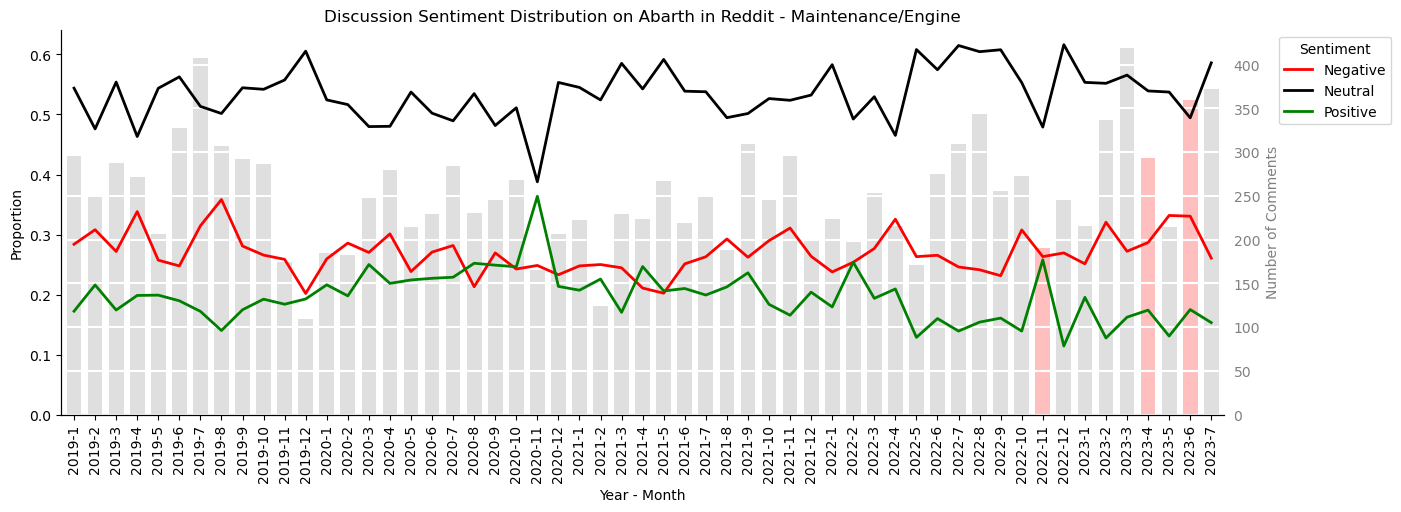

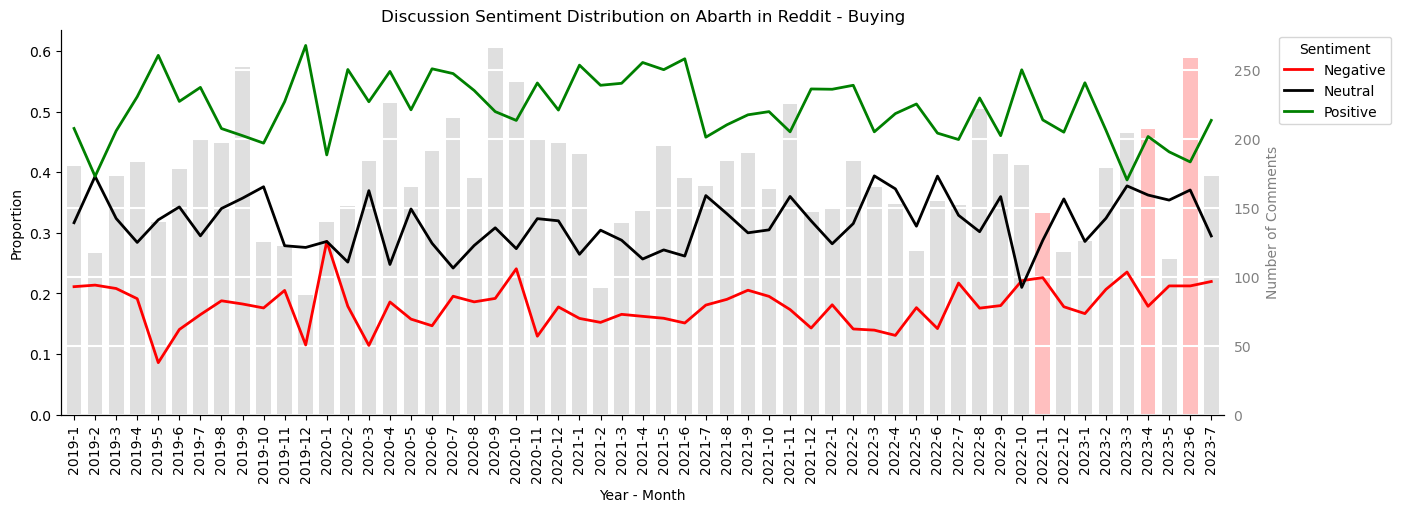

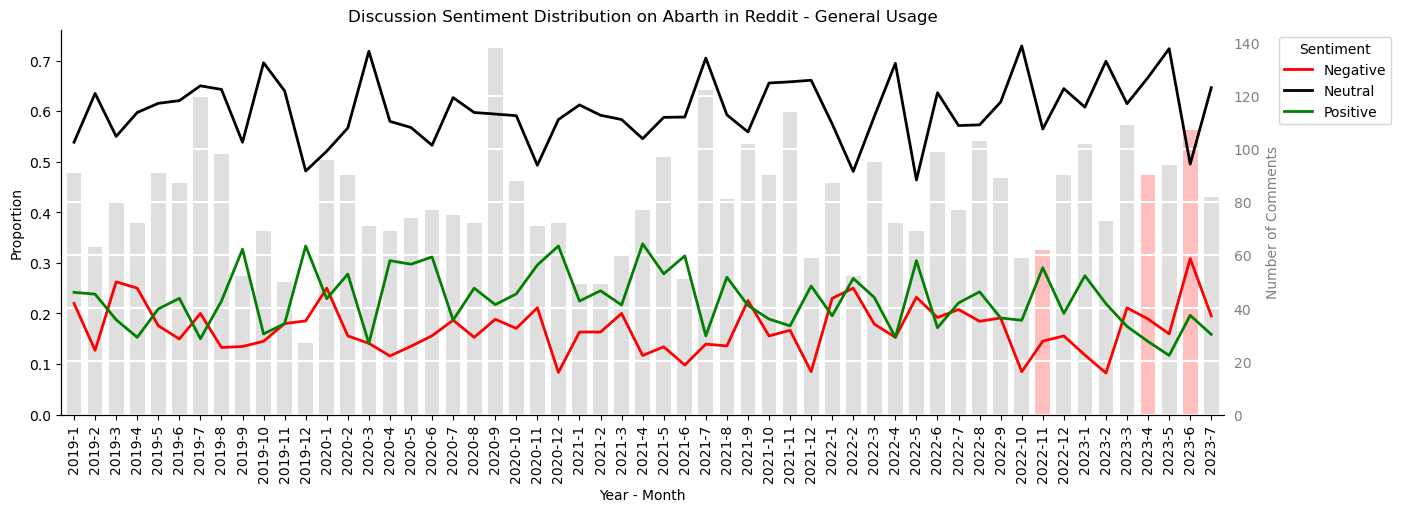

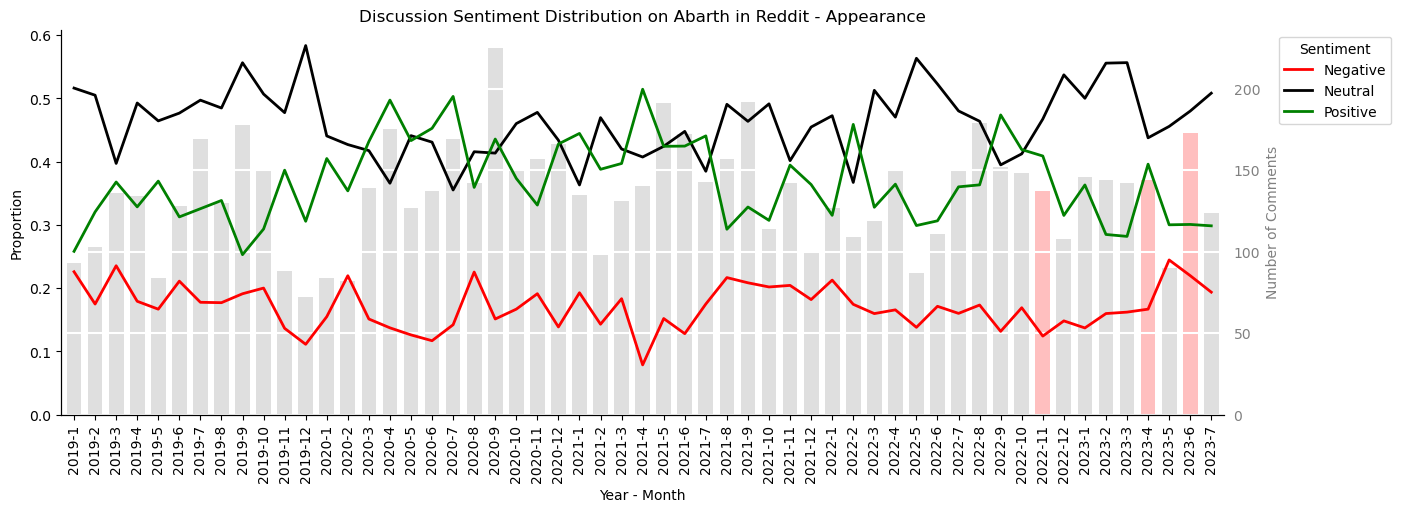

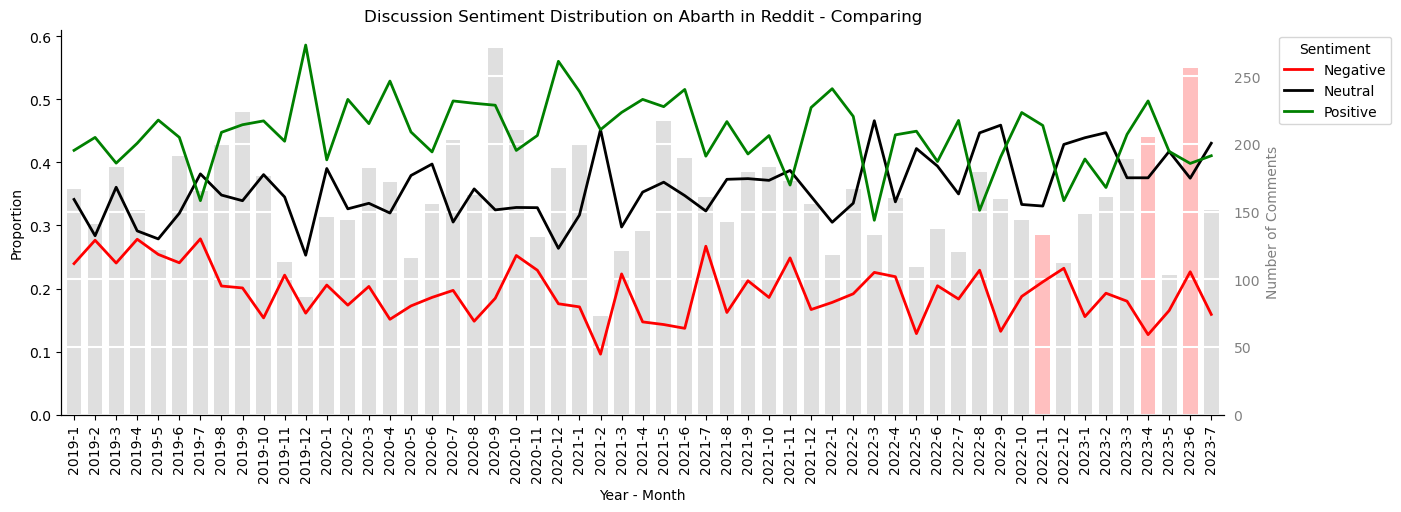

In [1091]:


#================================

for t,i in list(zip(['Maintenance/Engine',
                    'Buying',
                    'General Usage',
                    'Appearance',
                    'Comparing'],
                    [0,2,3,4,5])):


    result = resultt[resultt.topic==i]

    #==========================
    # get proportions for the topics
    result['total'] = result['negative']+result['neutral']+result['positive']
    result['negative'] /= result['total']
    result['neutral'] /= result['total']
    result['positive'] /= result['total']
    
    ## 2nd plot

    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    # plot topic distribution
    result.plot.line(x = 'x',
                    y = ['negative','neutral','positive'],
                    figsize = (15, 5),
                    linewidth = 2,
                    ax = ax2,
                    color=['r','k','g'])
    # plot number of comments
    color = ['red' if (i == '2022-11') or (i == '2023-4') or (i == '2023-6') else 'grey' for i in result.x] #highlight significant dates
    result.plot.bar(x = 'x', y = 'total',
                    linewidth = 5,
                    color = color,
                    alpha = 0.25,
                    width = 0.7,
                    ax = ax,
                    legend = None)

    # set title and axis labels
    plt.title("Discussion Sentiment Distribution on Abarth in Reddit - "+t)
    ax.set_xlabel('Year - Month')
    ax2.set_ylabel('Proportion')
    ax.set_ylabel('Number of Comments',color='grey')

    # switch y-axis position
    ax.yaxis.set_ticks_position('right')
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_ticks_position('left')
    ax2.yaxis.set_label_position('left')

    # remove borders, turn y-axis for comment count to grey (supplementary axis)
    ax.spines['right'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.tick_params(right=False)
    ax.tick_params(axis='y',colors='grey')

    # add gridline for comment count
    for v in ax.get_yticks()[:-1]:
        ax.axhline(v,0,1,c='w')

    # set yticks for topic distribution (ax2: don't have tick at 0)
    ax2.set_ylim(bottom=0)

    # set topic legend
    ax2.legend(['Negative','Neutral','Positive'],
                title = 'Sentiment',
                loc=1,
                bbox_to_anchor = (1.15,1))

#### boxplot

In [1093]:
# group by ISO year, week, topic, then get the count
resultt = df[(df.time>=datetime.datetime(2018,12,31))&(df.time<datetime.datetime(2023,8,7))][['year2','week2','topic','Sentiment']].groupby(['year2','week2','topic','Sentiment']).size().unstack().fillna(0)
resultt.reset_index(inplace=True)
resultt['x'] = [str(x)+'-'+str(y).zfill(2) for x,y in zip(resultt.year2, resultt.week2)]

resultt['total'] = resultt['negative']+resultt['neutral']+resultt['positive']
resultt['negative'] /= resultt['total']
resultt['neutral'] /= resultt['total']
resultt['positive'] /= resultt['total']

resultt.head(10)


Sentiment  year2  week2  topic  negative   neutral  positive        x  total
0           2019      1      0  0.300000  0.466667  0.233333  2019-01   60.0
1           2019      1      2  0.263158  0.394737  0.342105  2019-01   38.0
2           2019      1      3  0.055556  0.833333  0.111111  2019-01   18.0
3           2019      1      4  0.105263  0.578947  0.315789  2019-01   19.0
4           2019      1      5  0.222222  0.333333  0.444444  2019-01   36.0
5           2019      2      0  0.298851  0.540230  0.160920  2019-02   87.0
6           2019      2      2  0.169231  0.261538  0.569231  2019-02   65.0
7           2019      2      3  0.187500  0.343750  0.468750  2019-02   32.0
8           2019      2      4  0.100000  0.650000  0.250000  2019-02   20.0
9           2019      2      5  0.214286  0.261905  0.523810  2019-02   42.0

C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\1437195849.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg1.legendHandles[0].set_facecolor('pink')
C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\1437195849.py:37: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg2.legendHandles[0].set_facecolor('lightblue')
C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\1437195849.py:38: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg3.legendHandles[0].set_facecolor('lightgreen')
C:\Users\Alvis Cheung\AppData\Local\Temp\ipykernel_12980\1437195849.py:39: MatplotlibDeprecationWarning: The legendHandles attribut

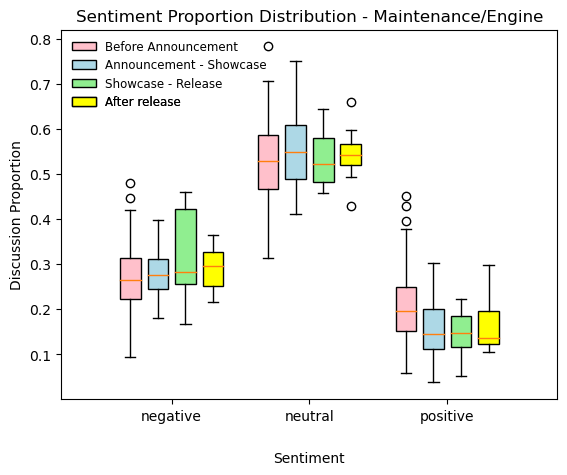

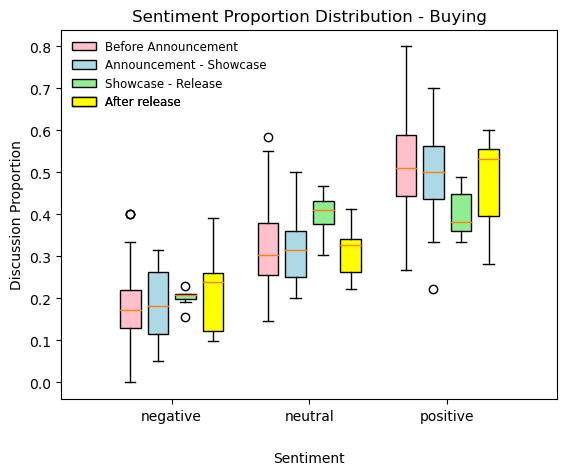

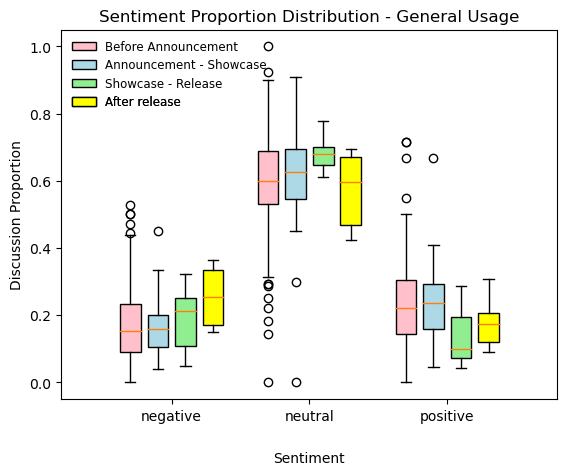

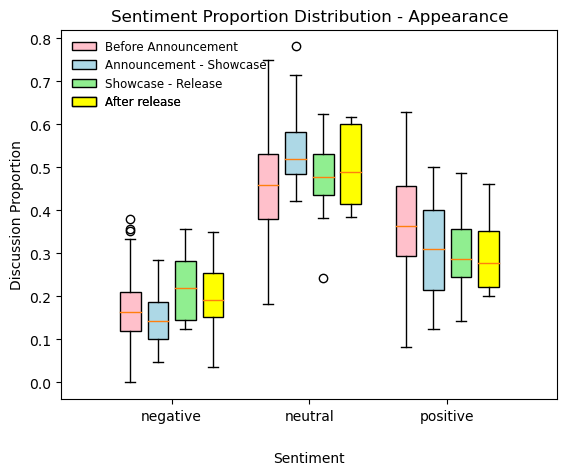

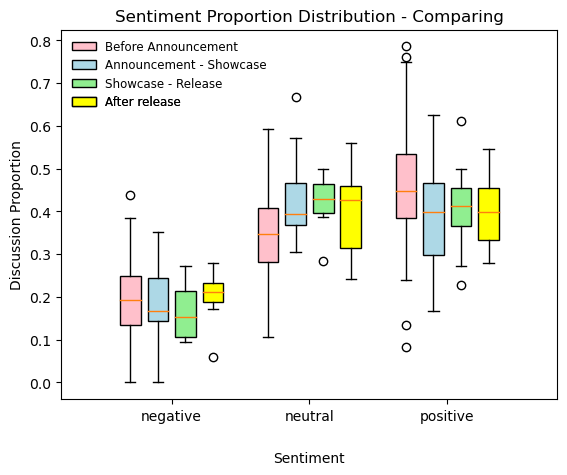

In [1094]:
#2022-47
#2023-16
#2023-24
for t, top in zip(['Maintenance/Engine',
                    'Buying',
                    'General Usage',
                    'Appearance',
                    'Comparing'],
                    [0,2,3,4,5]):

    result = resultt[resultt.topic==top]


    pos = np.array([1,2,3])
    width = 0.15

    # plot topic proportion boxplot by topic
    fig, ax = plt.subplots()
    ax.boxplot(result[result.x<'2022-47'][['negative','neutral','positive']], positions=pos-0.3, widths=width, patch_artist=True, boxprops = dict(facecolor="pink"))
    ax.boxplot(result[(result.x>='2022-47')&(result.x<'2023-16')][['negative','neutral','positive']], positions=pos-0.1, widths=width, patch_artist=True, boxprops = dict(facecolor="lightblue"))
    ax.boxplot(result[(result.x>='2023-16')&(result.x<'2023-24')][['negative','neutral','positive']], positions=pos+0.1, widths=width, patch_artist=True, boxprops = dict(facecolor="lightgreen"))
    ax.boxplot(result[result.x>='2023-24'][['negative','neutral','positive']], positions=pos+0.3, widths=width, patch_artist=True, boxprops = dict(facecolor="yellow"))

    # 
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(['negative','neutral','positive'])
    ax.set_ylabel("Discussion Proportion")
    ax.set_xlabel("Sentiment")
    ax.xaxis.set_label_coords(0.5,-0.14)
    ax.set_title("Sentiment Proportion Distribution - "+t)

    leg1 = ax.legend(['Before Announcement'],       loc=2,frameon=False,bbox_to_anchor=(0,1), fontsize=8.5)
    leg2 = ax.legend(['Announcement - Showcase'],   loc=2,frameon=False,bbox_to_anchor=(0,0.95), fontsize=8.5)
    leg3 = ax.legend(['Showcase - Release'],        loc=2,frameon=False,bbox_to_anchor=(0,0.9), fontsize=8.5)
    leg4 = ax.legend(['After release'],             loc=2,frameon=False,bbox_to_anchor=(0,0.85), fontsize=8.5)
    leg1.legendHandles[0].set_facecolor('pink')
    leg2.legendHandles[0].set_facecolor('lightblue')
    leg3.legendHandles[0].set_facecolor('lightgreen')
    leg4.legendHandles[0].set_facecolor('yellow')
    ax.add_artist(leg1)
    ax.add_artist(leg2)
    ax.add_artist(leg3)
    ax.add_artist(leg4)

    fig.show()

### Analysis 2 (weighted score)

In [169]:
dff = df.copy()

In [170]:
dff = dff.explode('doc2top')
dff['topic0'],dff['prob'] = zip(*dff.doc2top)
dff.head()

index                                               text  \
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   

                 time                                             tokens  \
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   

   year  quarter  month  week           doc2top  topic Sentiment  topic0  \
0  2022        2      4    16   (0, 0.19780774)      5  negative       0   
0  2022        2      4    16  (1, 0.010553178)      5  negative       1   
0  2022        2      4    16  (2, 0.010525506)      5  negative       2   
0  2022        2      4    16  (3, 0.010544368)      5  negative       3   
0  2022        2      4    16  (4, 0.010464371)      5  negative       4   

       prob  
0  0.197808  
0  0.010553  
0  0.010526  
0  0.010544  
0  0.010464

In [171]:
dff['Sentiment0'] = [1 if x == 'positive' else 0 if x == 'neutral' else -1 for x in dff.Sentiment]
dff['prob'] *= dff.Sentiment0
dff.head()

index                                               text  \
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   
0      0  Hello everyone, I own a 2016 Abarth 595 which ...   

                 time                                             tokens  \
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   
0 2022-04-19 23:14:53  [hello, develop, squealing, noise, brake, need...   

   year  quarter  month  week           doc2top  topic Sentiment  topic0  \
0  2022        2      4    16   (0, 0.19780774)      5  negative       0   
0  2022        2      4    16  (1, 0.010553178)      5  negative       1   
0  2022        2      4    16  (2, 0.010525506)      5  negative       2   
0  2022        2      4    16  (3, 0.010544368)      5  negative       3   
0  2022        2      4    16  (4, 0.010464371)      5  negative       4   

       prob  Sentiment0  
0 -0.197808          -1  
0 -0.010553          -1  
0 -0.010526          -1  
0 -0.010544          -1  
0 -0.010464          -1

In [221]:
# group by year, month, topic, then get the count
resulttt = dff[(dff.year>=2017)&(dff.time<datetime.datetime(2023,8,1))][['year','month','topic0','prob']].groupby(['year','month','topic0'])['prob'].agg({'sum'}).unstack()
resulttt.reset_index(inplace=True)
resulttt.columns = ['year','month',0,1,2,3,4,5]
resulttt['x'] = [str(x)+'-'+str(y) for x,y in zip(resulttt.year, resulttt.month)]
resulttt[0] += resulttt[1]
resulttt

year  month          0          1          2         3          4  \
0   2017      1  -2.199338   1.082771  16.629726  1.285962   3.333833   
1   2017      2   9.667535   3.955438  21.309370  3.194057   9.230981   
2   2017      3   6.128470   3.574488  15.230047  1.771324   3.565144   
3   2017      4  -3.877611   5.147638  19.972845  3.099082  10.513283   
4   2017      5  -4.269090  -5.803184  17.806707  3.593147  14.246616   
..   ...    ...        ...        ...        ...       ...        ...   
74  2023      3 -30.869535  -4.092746  24.400370  0.889179  15.919107   
75  2023      4   1.160375   6.237795  43.368400  3.069866  27.014136   
76  2023      5 -31.562836 -10.406947  16.920370 -2.100165   7.807514   
77  2023      6 -38.353377 -21.902034  38.637799 -2.686264  13.664566   
78  2023      7 -25.386344  -6.908123  36.708016  0.521362  13.844193   

            5       x  
0   17.917891  2017-1  
1   30.124116  2017-2  
2   17.246468  2017-3  
3   18.175329  2017-4  
4   16.701223  2017-5  
..        ...     ...  
74  38.147803  2023-3  
75  55.071725  2023-4  
76  18.347561  2023-5  
77  32.113001  2023-6  
78  28.242308  2023-7  

[79 rows x 9 columns]

In [249]:
resulttt.index.to_list()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78]

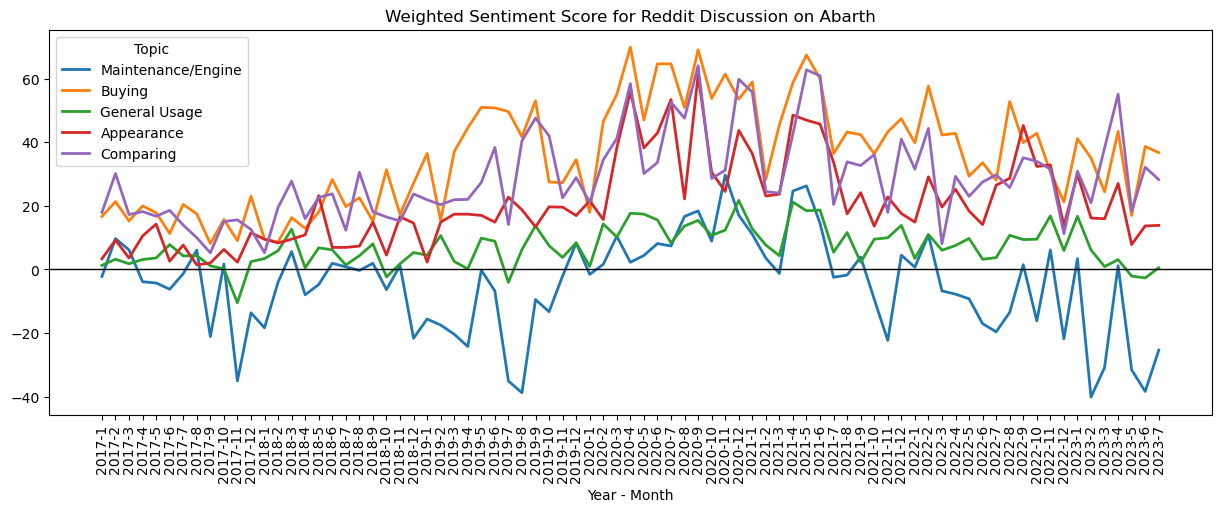

In [251]:
fig, ax = plt.subplots()

# plot topic distribution
resulttt.plot.line(x = 'x',
                y = [0,2,3,4,5],
                figsize = (15, 5),
                linewidth = 2,
                ax = ax)
ax.axhline(0, 0,1,c='k',lw=1)
ax.legend(['Maintenance/Engine',
            'Buying',
            'General Usage',
            'Appearance',
            'Comparing'],
            title = 'Topic')

# set title and axis labels
plt.title("Weighted Sentiment Score for Reddit Discussion on Abarth")
ax.set_xlabel('Year - Month')

ax.set_xticks(resulttt.index.to_list(),resulttt.x.to_list(),rotation=90)

# Archive

## Topic Modelling before & after launch

### split by annoucement date (22 Nov 2022)

In [182]:
datetime.datetime.fromtimestamp(max(dfCleanText.time)), datetime.datetime.fromtimestamp(min(dfCleanText.time))

(datetime.datetime(2023, 5, 18, 17, 54, 25),
 datetime.datetime(2013, 6, 21, 13, 13, 25))

In [188]:
dfCleanText.time = pd.to_datetime(dfCleanText.time,unit='s')

In [219]:
announce = datetime.datetime(2022,11,22,0,0,0)
dfBefore = dfCleanText[dfCleanText.time<announce]
dfAfter = dfCleanText[dfCleanText.time>=announce]
dfBefore.reset_index(drop=True,inplace=True)
dfAfter.reset_index(drop=True,inplace=True)

In [192]:
max(dfBefore.time), min(dfAfter.time)

(Timestamp('2022-11-21 23:46:57'), Timestamp('2022-11-22 05:58:36'))

In [221]:
dataBefore = dfBefore.text
dataAfter = dfAfter.text

### before launch (same codes)

In [194]:
# basic cleaning and tokenisation
tkn_docsB = [preprocess(text) for text in tqdm(dataBefore)]
tkn_docsB = [t for t in tkn_docsB if t != []]

# filter for long comments
tkn_longB = [t for t in tkn_docsB if len(t)>=10]

100%|██████████| 56748/56748 [13:17<00:00, 71.15it/s] 


In [199]:
# convert the data into gensim lda model required format
bigramB = Phrases(tkn_longB)
bigram_tknsB = [bigramB[line] for line in tkn_longB]

dictionaryB = Dictionary(bigram_tknsB)
corpusB = [dictionaryB.doc2bow(text) for text in bigram_tknsB]

# check most frequent words
dictionaryB.most_common(100)

[('car', 15849),
 ('abarth', 7989),
 ('like', 5861),
 ('look', 5499),
 ('drive', 5108),
 ('get', 4887),
 ('fiat', 4852),
 ('buy', 4055),
 ('go', 4001),
 ('think', 3953),
 ('good', 3874),
 ('time', 3518),
 ('know', 3482),
 ('want', 3383),
 ('need', 3164),
 ('work', 3080),
 ('new', 3065),
 ('issue', 3041),
 ('mile', 2955),
 ('find', 2922),
 ('thing', 2843),
 ('engine', 2644),
 ('come', 2452),
 ('year', 2404),
 ('replace', 2283),
 ('way', 2142),
 ('sure', 2128),
 ('try', 2087),
 ('lot', 2080),
 ('love', 2056),
 ('problem', 1968),
 ('well', 1929),
 ('little', 1921),
 ('say', 1875),
 ('turbo', 1854),
 ('start', 1839),
 ('run', 1807),
 ('use', 1756),
 ('check', 1731),
 ('stock', 1697),
 ('great', 1680),
 ('people', 1629),
 ('thank', 1622),
 ('right', 1622),
 ('bad', 1618),
 ('change', 1566),
 ('wheel', 1551),
 ('dealer', 1545),
 ('bit', 1509),
 ('pretty', 1502),
 ('probably', 1502),
 ('model', 1491),
 ('take', 1489),
 ('day', 1416),
 ('see', 1399),
 ('fix', 1394),
 ('fun', 1386),
 ('long', 1

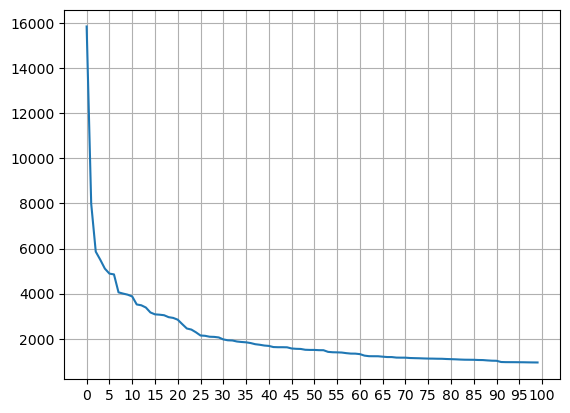

In [196]:
# frequency plot
plt.plot(np.arange(0,100), [v for k,v in dictionaryB.most_common(100)])
plt.xticks(np.arange(0,105,5))
plt.grid(True)

100%|██████████| 16/16 [07:07<00:00, 26.69s/it]


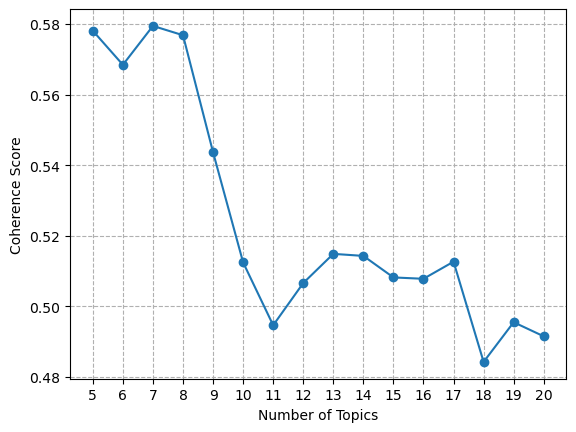

In [197]:
# put all to-be-removed words in a list (top 10 most frequent words + several other)
# remove those words from the token list
# convert the data into gensim lda model required format 
most_frequent_wordsB = [x[0] for x in dictionaryB.most_common(10)]
tkns_remove_topB = [[tkn for tkn in texts if tkn not in most_frequent_wordsB] for texts in bigram_tknsB]
dictionary1B = Dictionary(tkns_remove_topB)
corpus1B = [dictionary1B.doc2bow(text) for text in tkns_remove_topB]

# calculate the cohenrence scores for models of diff number of topics
coh_scoresB = []
for num_topics in tqdm(np.arange(5,21)):
    # lda topic modelling
    lda_model = LdaModel(
        corpus=corpus1B, num_topics=num_topics, id2word=dictionary1B, random_state=123)
    # model to get the coherence score
    coherence_model_lda = CoherenceModel(
        model=lda_model, texts=tkns_remove_topB, dictionary=dictionary1B, coherence='c_v')
    coh_scoresB.append(coherence_model_lda.get_coherence())
    
# plot coherence score VS number of topics
plt.plot(np.arange(5,21), coh_scoresB, marker="o")
plt.ylabel("Coherence Score")
plt.xlabel("Number of Topics")
plt.xticks(np.arange(5,21))
plt.grid(True, ls="--")

In [305]:
# define the optimal number of topics (highest coherence score, less topics)
bestNumB = 5
lda_modelB = LdaModel(
    corpus=corpus1B, num_topics=bestNumB, id2word=dictionary1B, random_state=123)

# save & load model
lda_modelB.save("LDAmodel_before")
lda_modelB = LdaModel.load("LDAmodel_before")

# show the topics' words
lda_modelB.show_topics(num_words = 8)

[(0,
  '0.008*"want" + 0.008*"wheel" + 0.007*"fit" + 0.007*"find" + 0.007*"come" + 0.006*"need" + 0.006*"well" + 0.006*"rear"'),
 (1,
  '0.014*"tire" + 0.011*"wheel" + 0.009*"new" + 0.007*"good" + 0.007*"love" + 0.007*"red" + 0.006*"color" + 0.006*"nice"'),
 (2,
  '0.012*"good" + 0.007*"stock" + 0.007*"want" + 0.006*"new" + 0.005*"great" + 0.005*"well" + 0.005*"tune" + 0.005*"price"'),
 (3,
  '0.010*"work" + 0.009*"need" + 0.008*"time" + 0.008*"manual" + 0.007*"check" + 0.007*"use" + 0.007*"want" + 0.007*"oil"'),
 (4,
  '0.014*"issue" + 0.010*"mile" + 0.009*"thing" + 0.009*"engine" + 0.008*"time" + 0.007*"problem" + 0.007*"replace" + 0.006*"know"')]

In [306]:
# doc-to-topic probability
doc2topicB = [lda_modelB.get_document_topics(corp, minimum_probability=0) for corp in corpus1B] #list of lists of tuples

doc2topB = [{t:p for t,p in LL} for LL in doc2topicB]
doc2topB = pd.DataFrame(doc2topB).values.tolist()
doc2topB = np.array(doc2topB)

doc2topB /= doc2topB.sum(axis=1, keepdims=True)

In [307]:
## check examples for each topic
# print examples
for i, topic in enumerate(lda_modelB.show_topics(num_words = 8)):
    print("Topic", topic[0])
    print(topic[1])
    print("------------------------------------------------------")
    print("Examples:")
    for count, index in enumerate(pd.DataFrame(doc2topB).sort_values(by=[i], ascending=False).reset_index()['index'][:5].to_list()):
        print(count,")",dataBefore[index])
    print("===================================================================")
    print()

Topic 0
0.008*"want" + 0.008*"wheel" + 0.007*"fit" + 0.007*"find" + 0.007*"come" + 0.006*"need" + 0.006*"well" + 0.006*"rear"
------------------------------------------------------
Examples:
0 ) I own a 2017 Abarth with 3800 miles on it. How often would you change the oil? Once a year?  More, since it is sitting around, not being driven? Less, because it is sitting around, not being driven?
1 ) An Abarth would be fun if as a first car but I'm afraid that you'll enjoy it a bit too much because driving it fast is almost too much fun. You can always opt for a cheaper version and have it tuned later, the tuned versions have more torque anyway.

A Renault Zoe would be suicidal though, anything but that.
2 ) Lol, not on purpose...
3 ) I also just bought my first! 2015 Manual, but in white with the black striping. Picking it up on Friday. Super stoked! Bring on the neighbor complaints :) Do you mind me asking what you paid for it?
4 ) Oof

Topic 1
0.014*"tire" + 0.011*"wheel" + 0.009*"new" + 

In [315]:
## pyLDAvis

# topic-to-word probability
topic2wordB = lda_modelB.state.get_lambda()

# dictionary
vocabB = [v for k,v in dictionary1B.items()]

# length of each document
doc_lengthsB = [len(doc) for doc in tkns_remove_topB]

# frequency of each word in the whole dataset
term_frequencyB = dictionary1B.cfs
myKeys = list(term_frequencyB.keys())
myKeys.sort()
term_frequencyB = {i: term_frequencyB[i] for i in myKeys}

prepared_dataB = pyLDAvis.prepare(
    topic2wordB, 
    doc2topB, 
    doc_lengthsB, 
    vocabB, 
    term_frequencyB,
    start_index=0, 
    sort_topics=False 
)

In [316]:
pyLDAvis.save_html(prepared_dataB, 'ldavis_before.html')
pyLDAvis.display(prepared_dataB)

### after launch (same code)

In [200]:
# basic cleaning and tokenisation
tkn_docsA = [preprocess(text) for text in tqdm(dataAfter)]
tkn_docsA = [t for t in tkn_docsA if t != []]

# filter for long comments
tkn_longA = [t for t in tkn_docsA if len(t)>=10]

#=========================================================

# convert the data into gensim lda model required format
bigramA = Phrases(tkn_longA)
bigram_tknsA = [bigramA[line] for line in tkn_longA]

dictionaryA = Dictionary(bigram_tknsA)
corpusA = [dictionaryA.doc2bow(text) for text in bigram_tknsA]

# check most frequent words
dictionaryA.most_common(100)

100%|██████████| 4818/4818 [00:55<00:00, 86.35it/s] 


[('car', 1006),
 ('abarth', 547),
 ('like', 430),
 ('look', 399),
 ('get', 359),
 ('drive', 343),
 ('fiat', 296),
 ('go', 295),
 ('work', 284),
 ('good', 270),
 ('know', 258),
 ('engine', 254),
 ('want', 251),
 ('need', 247),
 ('think', 245),
 ('time', 243),
 ('new', 224),
 ('issue', 222),
 ('buy', 222),
 ('find', 213),
 ('wheel', 180),
 ('mile', 180),
 ('start', 177),
 ('replace', 171),
 ('sure', 170),
 ('try', 169),
 ('check', 167),
 ('oil', 165),
 ('way', 163),
 ('come', 163),
 ('run', 161),
 ('well', 156),
 ('thing', 155),
 ('change', 150),
 ('year', 147),
 ('stock', 141),
 ('turbo', 141),
 ('love', 139),
 ('right', 137),
 ('use', 137),
 ('thank', 133),
 ('sound', 131),
 ('little', 130),
 ('problem', 129),
 ('bad', 128),
 ('tire', 126),
 ('bit', 120),
 ('light', 118),
 ('part', 118),
 ('long', 114),
 ('probably', 112),
 ('say', 110),
 ('exhaust', 110),
 ('make', 110),
 ('help', 108),
 ('sell', 108),
 ('lot', 107),
 ('big', 106),
 ('not', 106),
 ('fix', 106),
 ('take', 104),
 ('day'

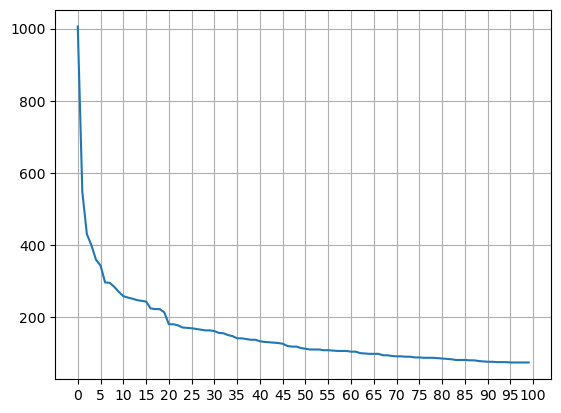

In [201]:
# frequency plot
plt.plot(np.arange(0,100), [v for k,v in dictionaryA.most_common(100)])
plt.xticks(np.arange(0,105,5))
plt.grid(True)

100%|██████████| 16/16 [03:04<00:00, 11.55s/it]


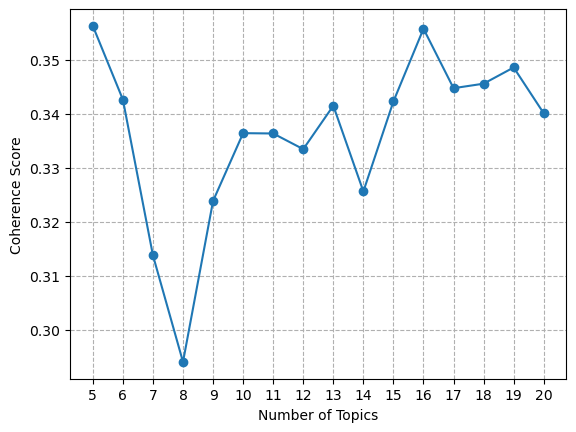

In [233]:
# put all to-be-removed words in a list (top 10 most frequent words + several other)
# remove those words from the token list
# convert the data into gensim lda model required format 
most_frequent_wordsA = [x[0] for x in dictionaryA.most_common(7)]
tkns_remove_topA = [[tkn for tkn in texts if tkn not in most_frequent_wordsA] for texts in bigram_tknsA]
dictionary1A = Dictionary(tkns_remove_topA)
corpus1A = [dictionary1A.doc2bow(text) for text in tkns_remove_topA]

# calculate the cohenrence scores for models of diff number of topics
coh_scoresA = []
for num_topics in tqdm(np.arange(5,21)):
    # lda topic modelling
    lda_model = LdaModel(
        corpus=corpus1A, num_topics=num_topics, id2word=dictionary1A, random_state=123)
    # model to get the coherence score
    coherence_model_lda = CoherenceModel(
        model=lda_model, texts=tkns_remove_topA, dictionary=dictionary1A, coherence='c_v')
    coh_scoresA.append(coherence_model_lda.get_coherence())
    
# plot coherence score VS number of topics
plt.plot(np.arange(5,21), coh_scoresA, marker="o")
plt.ylabel("Coherence Score")
plt.xlabel("Number of Topics")
plt.xticks(np.arange(5,21))
plt.grid(True, ls="--")

In [335]:
# define the optimal number of topics (highest coherence score, less topics)
bestNumA = 6
lda_modelA = LdaModel(
    corpus=corpus1A, num_topics=bestNumA, id2word=dictionary1A, random_state=123)

# save & load model
lda_modelA.save("LDAmodel_after")
lda_modelA = LdaModel.load("LDAmodel_after")

# show the topics' words
lda_modelA.show_topics(num_words = 8)

[(0,
  '0.010*"start" + 0.009*"time" + 0.008*"use" + 0.007*"check" + 0.007*"filter" + 0.007*"good" + 0.006*"mile" + 0.006*"work"'),
 (1,
  '0.013*"want" + 0.009*"engine" + 0.008*"work" + 0.008*"stock" + 0.007*"new" + 0.007*"mile" + 0.007*"ev" + 0.007*"little"'),
 (2,
  '0.009*"time" + 0.009*"start" + 0.009*"vehicle" + 0.008*"clutch_switch" + 0.007*"relay" + 0.006*"purchase" + 0.006*"little" + 0.006*"blow"'),
 (3,
  '0.010*"take" + 0.009*"know" + 0.007*"love" + 0.006*"time" + 0.006*"work" + 0.006*"experience" + 0.006*"want" + 0.006*"mile"'),
 (4,
  '0.011*"strut" + 0.010*"mile" + 0.009*"go" + 0.009*"tire" + 0.009*"rear" + 0.009*"socket" + 0.009*"far" + 0.008*"hear"'),
 (5,
  '0.008*"new" + 0.008*"good" + 0.007*"light" + 0.007*"love" + 0.007*"right" + 0.006*"wire" + 0.006*"performance" + 0.006*"think"')]

In [336]:
# doc-to-topic probability
doc2topicA = [lda_modelA.get_document_topics(corp, minimum_probability=0) for corp in corpus1A] #list of lists of tuples

doc2topA = [{t:p for t,p in LL} for LL in doc2topicA]
doc2topA = pd.DataFrame(doc2topA).values.tolist()
doc2topA = np.array(doc2topA)

doc2topA /= doc2topA.sum(axis=1, keepdims=True)

In [337]:
## check examples for each topic
for i, topic in enumerate(lda_modelA.show_topics(num_words = 8)):
    print("Topic", topic[0])
    print(topic[1])
    print("------------------------------------------------------")
    print("Examples:")
    for count, index in enumerate(pd.DataFrame(doc2topA).sort_values(by=[i], ascending=False).reset_index()['index'][:15].to_list()):
        print(count,")",dataAfter[index])
    print("===================================================================")
    print()


Topic 0
0.010*"start" + 0.009*"time" + 0.008*"use" + 0.007*"check" + 0.007*"filter" + 0.007*"good" + 0.006*"mile" + 0.006*"work"
------------------------------------------------------
Examples:
0 ) Maybe that’s a better option than the pop off filter, then. I know that was like 35 bucks, but it gets connected somewhere in the PCV routing (I think), and with the adapter plate, I don’t have to deal with that. I’m guessing it’s basically just a bolt-on?
1 ) Mundo pequeno mesmo. Na 2ª feira vi um Competizione amarelo em Entrecampos. Mal vi o amarelo pensei que podias ser tu ahahaha
2 ) Found some info about it here
[Fiat 500 Trike](https://www.carthrottle.com/post/whats-the-deal-with-this-mad-fiat-500-trike/)
3 ) A minha namorada disse-me que viu um Abarth amarelo, sábado antes de almoço em São Pedro \*do Sul ¬¬

Qual a chance do mundo ser demasiado pequeno?
4 ) Awesome, thanks! Wish me luck
5 ) https://www.ebay.co.uk/itm/192871734363?mkcid=16&mkevt=1&mkrid=711-127632-2357-0&ssspo=BxhrsMyM

In [338]:
## pyLDAvis

# topic-to-word probability
topic2wordA = lda_modelA.state.get_lambda()

# dictionary
vocabA = [v for k,v in dictionary1A.items()]

# length of each document
doc_lengthsA = [len(doc) for doc in tkns_remove_topA]

# frequency of each word in the whole dataset
term_frequencyA = dictionary1A.cfs
myKeys = list(term_frequencyA.keys())
myKeys.sort()
term_frequencyA = {i: term_frequencyA[i] for i in myKeys}

prepared_dataA = pyLDAvis.prepare(
    topic2wordA, 
    doc2topA, 
    doc_lengthsA, 
    vocabA, 
    term_frequencyA,
    start_index=0, 
    sort_topics=False 
)


In [339]:
pyLDAvis.save_html(prepared_dataA, 'ldavis_after.html')
pyLDAvis.display(prepared_dataA)

## Cleaning (old) (don't run)

In [15]:
#pip install langdetect

  Using cached langdetect-1.0.9-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [11]:
from langdetect import detect
import re # remove url
import string # remove punctuation

In [12]:
# remove url's
def remove_url(text):
     return re.sub(r"https?:\S*", "", text)

In [19]:
# remove punctuations
def remove_punc(text):
    return text.translate(str.maketrans('', '', '!"#$%&()*+-/:;<=>@[\]^_`{|}~£'))

In [19]:
print(string.punctuation)
print('!"#$%&()*+-/:;<=>@[\]^_`{|}~£')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+-/:;<=>@[\]^_`{|}~£


In [13]:
# standardize "'"
def replace_specialPunc(text):
    return text.replace('’',"'").replace('‘',"'")

In [21]:
# remove '[removed]'
# standardize "'"
# remove url
# remove punctuations
# trim spaces
dfCleanCleanText1 = [remove_punc(remove_url(replace_specialPunc(t.replace("[removed]","")))).strip() for t in data]



In [22]:
# check for language of the texts
langList = [detect(t) if t != '' else '' for t in dfCleanCleanText1]

LangDetectException: No features in text.

In [106]:
Counter(langList)

Counter({'en': 1363, '': 6, 'ca': 4, 'pl': 1, 'id': 1, 'cs': 1, 'et': 1})

In [107]:
# investigate non-english texts
[i for (i, v) in zip(dfCleanCleanText1, [(l!='en' and l!='') for l in langList]) if v]

['View Poll',
 'Looking at adding digital guard dawg kit',
 'ampx200B',
 'ampx200B',
 'Photos',
 'ampx200B',
 'Please advise',
 'I meant lt150']

In [23]:
def remove_spec_chars(text):
     text = re.sub('[a-zA-z0-9\s]', '' , text)
     return text

In [24]:
[remove_spec_chars(t) for t in data]

[',’,’£+😂.',
 ',‘.,’’...',
 '’.’&;...’.,’',
 "'$',.",
 '?.,.',
 '',
 "'£,.?'..,?",
 ",'??.",
 '""..?',
 ",'..?,..",
 '’,,+.’,,.',
 '.../../...,,.’’.,..’.../?’..’.,/.:(.).',
 "..'.?",
 '??',
 "'.,-..,.-./...()'.()./.?'(,').,'..!",
 "'','.,','.'$.'?(,)",
 '!&;.,().?!',
 ",.,,.'.,«/»,.:://.//(://.//):-()",
 ',,.?’&;’',
 ",(),.,',.,,'...!",
 ".,(),..,,-'.-.'.",
 ",?....'-()..,,,,.',,..','.'.?,?....'.",
 '.:,.?!',
 ',’?',
 '?-""(,,)()....!',
 '.:.’.,,.,..,.,,.’,.’.?',
 ",.',,,...',?'.?",
 '"..\'/****/\'.',
 '’......',
 "'/.'(-).'..",
 '’’’.’?',
 "'/'.','..(......)",
 '”.?,.',
 ',.....,.,',
 '’,’().?',
 '??.',
 '.',
 ',.*:-..*&;#;#//.-&;#;****&;#;*(://../)*,,+,,.&;#;*(://.../)*,,\'.,\'&;#;**/+**&;#;*(://../)*.,,(,),,%,"****".(!)&;#;*(://./)*,.,\',.,"",.&;#;*(://.//--)*-.,.(-)\',.&;#;*(://./)*,.,,.,./,.&;#;****&;#;*,\'.\':*()*()*,\',.,,.(://.//---),.""(://../.?=&;=&;=&;=)*,\'.,,.***:**""-,"""".,.""(://../.?=&;=&;=&;=)***:**,.(),.*""-,...*.**""-,,%**..***:**+-.,,!*.****:***()*()***:***()*()*()

In [25]:
nlp = spacy.load("en_core_web_sm")

In [28]:
[token.is_ascii for token in nlp('à')]

[False]

In [29]:
[token.is_ascii for token in nlp('£')]

[False]

In [30]:
[token.is_ascii for token in nlp('😂')]

[False]

In [109]:
dfCleanText1.text

0       Hello everyone, I own a 2016 Abarth 595 which ...
1       Hello fellas,\n\nI got a ‘19 Competizione Seri...
2       I wasn’t able to find dryflow air filters for ...
3       I'll buy from EC if need be but if I can save ...
4       Any one know what could be going on? My ESC li...
                              ...                        
1372    My friend said I shot a solid 2 foot flame out...
1373    The current "new Fiat 500" has been in product...
1374    So yesterday I traded in my BMW 328xi for a 20...
1375    I can't decide. I like the red, but it might b...
1376    This subreddit was abandoned years ago and I w...
Name: text, Length: 1377, dtype: object

In [34]:
dfCleanText1.text[0].replace("’","'")

"Hello everyone, I own a 2016 Abarth 595 which has now developed a squealing noise so I think this is due to the brakes in need of replacement but I'm looking to upgrade from the stock brakes, has anyone got any suggestions on upgrades that DON'T cost £1000+ 😂 any help would be appreciated."

### tokenize -> lemmatize -> tokenize -> lemmatize

In [19]:
lemmas = [token.lemma_ for token in nlp(dfCleanText1.text[0].replace("’","'")) if (token.is_stop == False | token.is_punct == False | token.is_digit == False)]
lemmas = ' '.join(lemmas)
[token.lemma_ for token in nlp(lemmas) if (token.is_stop == False | token.is_punct == False | token.is_digit == False)]

['hello',
 'Abarth',
 'develop',
 'squealing',
 'noise',
 'think',
 'brake',
 'need',
 'replacement',
 'look',
 'upgrade',
 'stock',
 'brake',
 'suggestion',
 'upgrade',
 'cost',
 '£',
 '+',
 '😂',
 'help',
 'appreciate']

In [20]:
#pip install spacymoji

Note: you may need to restart the kernel to use updated packages.


### convert emoji to text

In [33]:
#pip install spacymoji

  Using cached spacymoji-3.1.0-py2.py3-none-any.whl (8.5 kB)
     -------------------------------------- 356.6/356.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351336 sha256=5b4fcb65207fc1e080ac99f907979c99475e200300847b0a3337fa07aade09d8
  Stored in directory: c:\users\alvis cheung\appdata\local\pip\cache\wheels\6c\26\9b\3321277958b9151065fecf0c0bf85999d626db41b8e0cfe919
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [26]:
from spacymoji import Emoji

In [27]:
nlp.add_pipe("emoji", first=True)

In [36]:
dfCleanText1.text[1]

'Hello fellas,\n\nI got a ‘19 Competizione Series 4 EU configuration. I want to export it in Florida, but I don’t know if it’s possible also to register the car there in order to keep it there. Any advice would be welcomed. Have a great day.'

In [42]:
# create a mapping for emojis to texts
emojiList = [(token.text, token._.emoji_desc)
             for token in nlp(dfCleanText1.text[0].replace("’","'"))
             if (token._.is_emoji == True)]
emojiDict = dict(emojiList)
emojiDict

{'😂': 'face with tears of joy'}

In [43]:
t1 = dfCleanText1.text[0]
t1

'Hello everyone, I own a 2016 Abarth 595 which has now developed a squealing noise so I think this is due to the brakes in need of replacement but I’m looking to upgrade from the stock brakes, has anyone got any suggestions on upgrades that DON’T cost £1000+ 😂 any help would be appreciated.'

In [44]:
# replace the emojis with their mapped texts

for key, value in emojiDict.items():
    t1 = t1.replace(key, value)
t1

'Hello everyone, I own a 2016 Abarth 595 which has now developed a squealing noise so I think this is due to the brakes in need of replacement but I’m looking to upgrade from the stock brakes, has anyone got any suggestions on upgrades that DON’T cost £1000+ face with tears of joy any help would be appreciated.'

In [113]:
"""
remove:
1) stop words
2) punctuations
3) digits
4) symbols
"""

lemmas = [token.lemma_ for token in nlp(t1.replace("’","'"))
          if (token.is_stop == False) & (token.is_punct == False) & (token.is_digit == False) & ((token.pos_=="SYM")==False)]

lemmas


['hello',
 'Abarth',
 'develop',
 'squealing',
 'noise',
 'think',
 'brake',
 'need',
 'replacement',
 'look',
 'upgrade',
 'stock',
 'brake',
 'get',
 'suggestion',
 'upgrade',
 "don't",
 'cost',
 'face',
 'tear',
 'joy',
 'help',
 'appreciate']

In [69]:
# join the lemmas, and tokenize again to ensure everything is properly tokenized (eg DON'T -> don't -> do not)
lemmas = [(token.lemma_, token.pos_) for token in nlp(' '.join(lemmas))
          if (token.is_stop == False | token.is_punct == False | token.is_digit == False)]
lemmas


[('hello', 'INTJ'),
 ('Abarth', 'PROPN'),
 ('develop', 'VERB'),
 ('squealing', 'NOUN'),
 ('noise', 'NOUN'),
 ('think', 'VERB'),
 ('brake', 'NOUN'),
 ('need', 'VERB'),
 ('replacement', 'NOUN'),
 ('look', 'NOUN'),
 ('upgrade', 'VERB'),
 ('stock', 'NOUN'),
 ('brake', 'NOUN'),
 ('suggestion', 'NOUN'),
 ('upgrade', 'NOUN'),
 ('cost', 'VERB'),
 ('face', 'NOUN'),
 ('tear', 'ADJ'),
 ('joy', 'NOUN'),
 ('help', 'NOUN'),
 ('appreciate', 'VERB')]

In [45]:
len(dfCleanCleanText1)

1841

## All text (old) (don't run)

### cleaning

In [33]:
allText = ' '.join(data)
allText = allText.replace("’","'")

In [34]:
dfCleanCleanText1 = [text.replace("’","'") for text in data]

In [35]:
lemmas = [' '.join(
            [token.lemma_ for token in nlp(text)
            if (token.is_stop == False | token.is_punct == False | token.is_digit == False | (token.pos_=="SYM")==False)
            ])
        for text in dfCleanCleanText1
        ]

lemmas

["hello Abarth develop squealing noise think brake need replacement look upgrade stock brake get suggestion upgrade don't cost 😂 help appreciate",
 'hello fellas \n\n get Competizione Series EU configuration want export Florida know possible register car order advice welcome great day',
 'able find dryflow air filter 500abarth want deal oil base air filter like k&amp;n look well airflow ease maintenance expect power gain AEM DryFlow mazda3 40k mile great recommendation great',
 'buy EC need save $ go to lol',
 'know go ESC light come highway car drive fine normal cause check engine light come',
 'difference bhp autotrader specsheet \n competizione model think till',
 'get £ 9k budget like screen new one cause interior feel old idk preference mileage look 50k mile idk expert share opinion wait base model 2017ish screen help deal date interior bit old essesse turismo competizione high mileage low mileage old 500',
 'hi guy join Abarth family \n month want ask \n worth Competizione \n Tur

In [ ]:
emojiList = set([(token.text, token._.emoji_desc)
             for token in nlp(allText)
             if (token._.is_emoji == True)])
emojiDict = dict(emojiList)
emojiDict

{'🇧🇪': 'Belgium',
 '😔': 'pensive face',
 '😬': 'grimacing face',
 '®': 'registered',
 '🤩': 'star-struck',
 '🎉': 'party popper',
 '😁': 'beaming face with smiling eyes',
 '👍🏾': 'thumbs up medium-dark skin tone',
 '😎': 'smiling face with sunglasses',
 '😥': 'sad but relieved face',
 '🦂': 'scorpion',
 '😊': 'smiling face with smiling eyes',
 '🤷\u200d♂️': 'man shrugging',
 '😉': 'winking face',
 '☹️': 'frowning face',
 '❤️': 'red heart',
 '😢': 'crying face',
 '💥': 'collision',
 '🤦': 'person facepalming',
 '🤦🏼\u200d♂️': 'man facepalming medium-light skin tone',
 '🤪': 'zany face',
 '😂': 'face with tears of joy',
 '👌🏼': 'OK hand medium-light skin tone',
 '👋🏻': 'waving hand light skin tone',
 '🤷\u200d♀️': 'woman shrugging',
 '😅': 'grinning face with sweat',
 '🥴': 'woozy face',
 '👍🏼': 'thumbs up medium-light skin tone',
 '🤞': 'crossed fingers'}

In [113]:
####
allTextnoEmoji = allText

In [114]:
lemmaNoEmoji = lemmas.copy()

In [115]:
lammaNoEmoji = []
for text in lemmas:
    tmp = text
    for key, value in emojiDict.items():
        tmp = tmp.replace(key, value)
    lammaNoEmoji.append(tmp)
lammaNoEmoji


["hello Abarth develop squealing noise think brake need replacement look upgrade stock brake get suggestion upgrade don't cost face with tears of joy help appreciate",
 'hello fellas \n\n get Competizione Series EU configuration want export Florida know possible register car order advice welcome great day',
 'able find dryflow air filter 500abarth want deal oil base air filter like kampn look well airflow ease maintenance expect power gain AEM DryFlow mazda3 40k mile great recommendation great',
 'buy EC need save   go to lol',
 'know go ESC light come highway car drive fine normal cause check engine light come',
 'difference bhp autotrader specsheet \n competizione model think till',
 'get 9k budget like screen new one cause interior feel old idk preference mileage look 50k mile idk expert share opinion wait base model 2017ish screen help deal date interior bit old essesse turismo competizione high mileage low mileage old 500',
 'hi guy join Abarth family \n month want ask \n worth Co

In [116]:
lamma2NoEmoji = [' '.join(
                    [token.lemma_ for token in nlp(text)
                    if (token.is_stop == False | token.is_punct == False | token.is_digit == False |
                        (token.pos_=="SYM")==False)
                    ])
                for text in lammaNoEmoji
                ]

lamma2NoEmoji = [' '.join(
                    [token.lemma_ for token in nlp(text)
                    if (token.is_stop == False | token.is_punct == False | token.is_digit == False |
                        (token.pos_=="SYM")==False  | (token.pos_=="SPACE")==False)
                    ])
                for text in lamma2NoEmoji
                ]

lamma2NoEmoji

['hello Abarth develop squealing noise think brake need replacement look upgrade stock brake suggestion upgrade cost face tear joy help appreciate',
 'hello fellas Competizione Series EU configuration want export Florida know possible register car order advice welcome great day',
 'able find dryflow air filter 500abarth want deal oil base air filter like kampn look airflow ease maintenance expect power gain AEM DryFlow mazda3 40k mile great recommendation great',
 'buy EC need save lol',
 'know ESC light come highway car drive fine normal cause check engine light come',
 'difference bhp autotrader specsheet competizione model think till',
 '9k budget like screen new cause interior feel old idk preference mileage look 50k mile idk expert share opinion wait base model 2017ish screen help deal date interior bit old essesse turismo competizione high mileage low mileage old',
 'hi guy join Abarth family month want ask worth Competizione Turismo big difference price want daily driver',
 'try

### old topic modelling

In [48]:
#pip install tomotopy

  Using cached tomotopy-0.12.4-cp311-cp311-win_amd64.whl (5.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
import tomotopy as tp
import matplotlib.pyplot as plt

In [ ]:
lamma2NoEmoji

In [117]:
docs_tokens = []

In [118]:
for item in lammaNoEmoji:
    tmp_tokens = [
        token.lemma_
        for token in nlp(item)
        if not token.is_stop and not token.is_punct and not token.like_num
    ]
    docs_tokens.append(tmp_tokens)
    tmp_tokens = []


In [72]:
## bigram, trigram

In [12]:
connector_words = [
    u"of",
    u"with",
    u"without",
    u"and",
    u"or",
    u"the",
    u"a",
    u"not",
    u"be",
    u"to",
    u"this",
    u"who",
    u"in",
]

In [14]:
bigram = Phrases(                              # step 1 
    tkn_docs,
    min_count=50,
    threshold=5,
    max_vocab_size=50000,
    connector_words=connector_words,
)
trigram = Phrases(                             # step 2
    bigram[tkn_docs],
    min_count=50,
    threshold=5,
    max_vocab_size=50000,
    connector_words=connector_words,
)

In [15]:
docs_phrased = [trigram[bigram[line]] for line in tkn_docs]

In [16]:
corpus = tp.utils.Corpus()           # step 1: the empty corpus
for item in tqdm(docs_phrased):             # step 2: we populate the corpus as we
    corpus.add_doc(words=item)       #         iterate over tokenized docs

100%|██████████| 30987/30987 [00:00<00:00, 131303.07it/s]


In [17]:
corpus = tp.utils.Corpus()           # step 1: the empty corpus
for item in tqdm(tkn_docs):             # step 2: we populate the corpus as we
    corpus.add_doc(words=item)       #         iterate over tokenized docs

  0%|          | 0/30987 [00:00<?, ?it/s]

100%|██████████| 30987/30987 [00:00<00:00, 146781.05it/s]


In [18]:
cvs = {}    # record coherence score
models = {} # save models
for topic_number in tqdm(range(25, 500, 25)):
    mdl = tp.LDAModel(k=topic_number, corpus=corpus, rm_top=3, min_df=10)
    mdl.train(10)
    
    coh = tp.coherence.Coherence(mdl, coherence="u_mass")
    cvs[topic_number] = coh.get_score()
    models[topic_number] = mdl

100%|██████████| 19/19 [00:59<00:00,  3.13s/it]


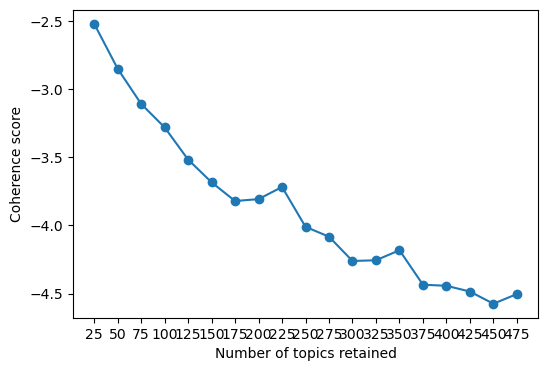

In [19]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(cvs.keys(), cvs.values(), "o-")
ax.set_xlabel("Number of topics retained")
ax.set_ylabel("Coherence score")
ax.set_xticks(range(25, 500, 25))
plt.show()

In [20]:
mdl = tp.LDAModel(k=450, corpus=corpus, rm_top=3, min_df=10)
mdl.train(10)

In [21]:
mdl.summary()

<Basic Info>
| LDAModel (current version: 0.12.4)
| 30512 docs, 374339 words
| Total Vocabs: 15997, Used Vocabs: 3446
| Entropy of words: 7.12680
| Entropy of term-weighted words: 7.12680
| Removed Vocabs: car abarth like
|
<Training Info>
| Iterations: 10, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -9.92527
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 10 (minimum document frequency of words)
| rm_top: 3 (the number of top words to be removed)
| k: 450 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 645325340 (random seed)
| trained in version 0.12.4
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)


## Sentiment Analysis (old)

In [120]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Alvis
[nltk_data]     Cheung\AppData\Roaming\nltk_data...


True

In [135]:
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0
df1

row_id sentiment_type  sentiment_score
0  99999999999        NA999NA                0

In [233]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in enumerate(dfCleanCleanText1):
    scores = sid.polarity_scores(row)
    for key, value in scores.items():
        temp = [key,value,index]
        df1['row_id']=index
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        #print(df1)
        t_df = pd.concat([t_df,df1])
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
   row_id sentiment_type  sentiment_score
0       0       compound           0.8402
0       1       compound           0.8720
0       2       compound           0.9367
0       3       compound           0.7964
0       4       compound           0.1027
0       5       compound           0.0000
0       6       compound           0.3829
0       7       compound           0.2960
0       8       compound           0.4588
0       9       compound           0.1280


In [234]:
t_df_cleaned

row_id sentiment_type  sentiment_score
0        0       compound           0.8402
0        1       compound           0.8720
0        2       compound           0.9367
0        3       compound           0.7964
0        4       compound           0.1027
..     ...            ...              ...
0     1836       compound           0.5994
0     1837       compound           0.2960
0     1838       compound          -0.0387
0     1839       compound          -0.1419
0     1840       compound           0.8360

[1841 rows x 3 columns]

In [235]:
dfCleanCleanText1[0]

'Hello everyone I own a 2016 Abarth 595 which has now developed a squealing noise so I think this is due to the brakes in need of replacement but I’m looking to upgrade from the stock brakes has anyone got any suggestions on upgrades that DON’T cost £1000 😂 any help would be appreciated'

In [157]:
sid.polarity_scores("I am very happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [151]:
sid.polarity_scores("My friend said I shot a solid 2 foot flame out of my car last night. Stock exhaust. Just curious if any of y'all have done it")

{'neg': 0.075, 'neu': 0.683, 'pos': 0.242, 'compound': 0.5994}